# Lead Scoring Model

## Process Flow

1. Understanding Problem Statement
2. Hypothesis Generation
3. Getting the system ready and loading the data
4. Understanding the data-Data Eyeballing & Data Description
5. Data Cleaning & Preprocessing I
6. Feature Engineering
7. Exploratory Data Analysis (EDA)
    - Univariate Analysis
    - Bivariate Analysis
    - Multivariate Analysis
8. Insights from Data Visualization
9. Feature Engineerig
10. Model Buidling & Evaluation
11. Selection of Best Model & Hyperparameter Tuninng
12. Generating Pickle file


6. Missing Value and Outlier Treatment
7. Evaluation Metrics for classification problems
8. Model Building Part-I
9. Logistics regression using stratified k-folds cross validation
10. Feature Engineering
11. Model Building Part-II
    Logistic Regression
    Decision Tree
    Random Forest
    XGBoost

## 1. Understanding Problem Statement

A lead is someone who has shown an interest in a particular product and is very likely to buy the product. 

Lead is captured in 2 ways: Direct and Indirect ways. 

Direct ones are captured by the users filling out the form. Indirect ones are captured by the users who have not filled out the form but visited the page. You are provided with the direct leads who filled out the forms.

Lead is captured from the forms. Any user who fills out the form is known as a lead. Identifying the potential leads beforehand will help us to prioritize the leads and pitch our product to these users first. 

Potential leads have a higher chance of buying the product compared to other leads. We can identify the potential leads by assigning every lead a score.


The objective of the problem is to build a smart system to assign a score to the user based on his user journey

## 2. Hypothesis Generation

Hypothesis generation is an important step in building a lead scoring model. It involves formulating initial assumptions or hypotheses about the factors that may contribute to the likelihood of a lead converting into a customer. Here's an example of hypothesis generation for a lead scoring model:

- Hypothesis 1: Form Type Hypothesis
    - Leads generated from specific form types (e.g., demo request, pricing inquiry) are more likely to convert into customers compared to other form types.

- Hypothesis 2: User Experience Hypothesis
    - Leads with a higher level of user experience (e.g., advanced users, power users) are more likely to convert into customers compared to leads with lower levels of user experience.

- Hypothesis 3: UTM Source Hypothesis
    - Leads coming from specific UTM sources (e.g., organic search, referral traffic) have a higher conversion rate compared to leads from other sources.

- Hypothesis 4: Lead Vintage Hypothesis
    - Leads that have been in the system for a longer time (higher lead vintage) are more likely to convert into customers compared to newly acquired leads.

- Hypothesis 5: Engagement Hypothesis
    - Leads that have a higher number of interactions (e.g., page visits, email opens) with the company's website or - marketing materials are more likely to convert into customers.

- Hypothesis 6: Demographic Hypothesis
    - Leads from specific demographic segments (e.g., age group, location, industry) have a higher propensity to convert into customers compared to leads from other segments.

- Hypothesis 7: Lead Rate Hypothesis
    - Leads with a higher lead rate (more frequent lead generation) are more likely to convert into customers compared to leads with a lower lead rate.

Hypotheses can be further validated and refined through data analysis and model training to build an effective lead scoring system.

## 3. Getting the system ready and loading the data

In [1]:
#Loading packages

import pandas as pd
import numpy as np                   # For mathematical calculations
import seaborn as sns                # For Data Visualization
import matplotlib.pyplot as plt      # For plotiing graphs
%matplotlib inline
import warnings                      # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading Data

data = pd.read_csv('data.csv')

## 4. Understanding the Data

In [3]:
# Features  present in our data

data.columns

Index(['created_at', 'subdomain', 'ext', 'country_code', 'form_type',
       'experience', 'utm_source', 'utm_medium', 'is_signedup', 'vintage',
       'weekday', 'quarter', 'is_weekend', 'is_month_start', 'is_month_end',
       'is_quarter_start', 'is_quarter_end', '#leads', 'lead_rate', 'form_1',
       'form_6', 'form_7', 'form_2', 'form_3', 'form_4', 'form_5', 'form_8',
       'form_9', 'form_10', 'form_11', 'form_12', 'form_13', 'form_14',
       'form_15', 'buy'],
      dtype='object')

### Feature  Description

- Created_at: date and time at which lead was dropped 
- Subdomain: domain of the email id 
-  Ext: extension of the email id 
-  Country_code: country code of the user
- Form_type: type of the form through which the user has dropped a lead 
-  Experience: experience of the user
- Utm_source: UTM source of the lead
- Utm_medium: UTM medium of the lead 
- Is_signedup: boolean flag indicating if the user has signed up while dropping the lead 
-  vintage: vintage of the user
- DateTime features:
- weekday
-  quarter
- is_weekend
-  is_month_start
-  is_month_end 
- is_quarter_start 
- is_quarter_end 
- #leads: no. of leads dropped in the last 3 months
- lead_rate: no. of leads/time 
- Form_{1-15}: no. of leads dropped through different forms 
- buy: target variable indicating if the user has bought the product in the next 90 days after dropping the lead

In [4]:
print('The size of Dataframe is: ', data.shape)
print('-'*100)
print('The Column Name, Record Count and Data Types are as follows: ')
data.info()
print('-'*100)

The size of Dataframe is:  (60295, 35)
----------------------------------------------------------------------------------------------------
The Column Name, Record Count and Data Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60295 entries, 0 to 60294
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   created_at        60295 non-null  object 
 1   subdomain         60295 non-null  object 
 2   ext               60295 non-null  object 
 3   country_code      60295 non-null  object 
 4   form_type         60295 non-null  object 
 5   experience        60295 non-null  object 
 6   utm_source        60295 non-null  object 
 7   utm_medium        60295 non-null  object 
 8   is_signedup       60295 non-null  bool   
 9   vintage           60295 non-null  int64  
 10  weekday           60295 non-null  int64  
 11  quarter           60295 non-null  int64  
 12  is_weekend        60295 no

In [5]:
# Data Eyeballing

data.head()

,created_at,subdomain,ext,country_code,form_type,experience,utm_source,utm_medium,is_signedup,vintage,...,form_5,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,buy
0,2021-01-01 7:26:01,hotmail,com,combined,form_1,Fresher,source_1,medium_1,False,-1,...,0,0,0,0,0,0,0,0,0,0
1,2021-01-01 10:38:59,gmail,com,91,form_2,Fresher,source_1,medium_1,True,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-01-01 10:46:46,gmail,com,91,form_3,Fresher,source_1,medium_2,True,7,...,0,0,0,0,0,0,0,0,0,0
3,2021-01-01 11:51:01,gmail,com,91,form_4,Fresher,source_2,medium_3,False,-1,...,0,0,0,0,0,0,0,0,0,0
4,2021-01-01 13:21:47,gmail,com,1,form_1,Fresher,source_1,medium_1,True,166,...,0,0,0,0,0,0,0,0,0,0


In [6]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

data.head()

,created_at,subdomain,ext,country_code,form_type,experience,utm_source,utm_medium,is_signedup,vintage,weekday,quarter,is_weekend,is_month_start,is_month_end,is_quarter_start,is_quarter_end,#leads,lead_rate,form_1,form_6,form_7,form_2,form_3,form_4,form_5,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,buy
0,2021-01-01 7:26:01,hotmail,com,combined,form_1,Fresher,source_1,medium_1,False,-1,4,1,0,True,False,True,False,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-01-01 10:38:59,gmail,com,91,form_2,Fresher,source_1,medium_1,True,0,4,1,0,True,False,True,False,1,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2021-01-01 10:46:46,gmail,com,91,form_3,Fresher,source_1,medium_2,True,7,4,1,0,True,False,True,False,4,4.0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2021-01-01 11:51:01,gmail,com,91,form_4,Fresher,source_2,medium_3,False,-1,4,1,0,True,False,True,False,1,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2021-01-01 13:21:47,gmail,com,1,form_1,Fresher,source_1,medium_1,True,166,4,1,0,True,False,True,False,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# Defining numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 27 numerical features : ['is_signedup', 'vintage', 'weekday', 'quarter', 'is_weekend', 'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end', '#leads', 'lead_rate', 'form_1', 'form_6', 'form_7', 'form_2', 'form_3', 'form_4', 'form_5', 'form_8', 'form_9', 'form_10', 'form_11', 'form_12', 'form_13', 'form_14', 'form_15', 'buy']

We have 8 categorical features : ['created_at', 'subdomain', 'ext', 'country_code', 'form_type', 'experience', 'utm_source', 'utm_medium']


In [8]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print('-'*100)
total_missing=data.isnull().sum().sort_values(ascending=False)
percent_missing=(data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows : 
----------------------------------------------------------------------------------------------------


,Total,Percent
created_at,0,0.0
form_8,0,0.0
form_6,0,0.0
form_7,0,0.0
form_2,0,0.0
form_3,0,0.0
form_4,0,0.0
form_5,0,0.0
form_9,0,0.0
lead_rate,0,0.0


#### Inference

After inspecting the dataframe, **no missing values** found.

In [9]:
print('Duplicates in DataFrame are as follows : ')
print('-'*100)
data.duplicated().sum()

Duplicates in DataFrame are as follows : 
----------------------------------------------------------------------------------------------------


0

#### Inference
No duplicates present

In [10]:
print('Summary Statistics of numerical features for DataFrame are as follows:')
print('-'*100)
data.describe()

Summary Statistics of numerical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,vintage,weekday,quarter,is_weekend,#leads,lead_rate,form_1,form_6,form_7,form_2,form_3,form_4,form_5,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,buy
count,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000,60295.000000
mean,264.890721,2.832722,2.548271,0.234630,1.563397,1.071697,0.238942,0.544772,0.240186,0.007364,0.091052,0.022887,0.129132,0.023053,0.004262,0.011261,0.010565,0.201940,0.011129,0.002985,0.023866,0.016403
std,450.987595,1.920341,1.033660,0.423771,1.124497,0.749539,0.524273,0.632525,0.472827,0.088546,0.303290,0.152620,0.365407,0.357732,0.066906,0.115142,0.105907,0.546616,0.111496,0.056645,0.205679,0.127019
min,-1.000000,0.000000,1.000000,0.000000,1.000000,0.001513,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,3.000000,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,328.000000,4.000000,3.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2831.000000,6.000000,4.000000,1.000000,26.000000,20.000000,20.000000,19.000000,6.000000,2.000000,5.000000,2.000000,7.000000,26.000000,2.000000,4.000000,2.000000,16.000000,3.000000,3.000000,6.000000,1.000000


In [11]:
print('Summary Statistics of categorical features for DataFrame are as follows:')
print('-'*100)
data.describe(include= 'object')

Summary Statistics of categorical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,created_at,subdomain,ext,country_code,form_type,experience,utm_source,utm_medium
count,60295,60295,60295,60295,60295,60295,60295,60295
unique,60046,13,12,57,15,5,12,14
top,2021-05-10 14:16:52,gmail,com,91,form_6,Fresher,source_6,medium_6
freq,117,49636,56231,31871,20975,22403,21753,21913


In [12]:
data['created_at'] = pd.to_datetime(data['created_at'])

In [13]:
for feature in data:
    if data[feature].dtype == 'object':
        print(f"{feature}:",data[feature].nunique(), data[feature].unique())
        print("-"*100)

subdomain: 13 ['hotmail' 'gmail' 'combined' 'yahoo' 'outlook' 'rediffmail' 'aol' 'live'
 'gamil' 'mail' 'icloud' 'qq' 'fractal']
----------------------------------------------------------------------------------------------------
ext: 12 ['com' 'ac.in' 'combined' 'edu' 'co.uk' 'net' 'in' 'fr' 'co.in' 'edu.in'
 'org' 'ai']
----------------------------------------------------------------------------------------------------
country_code: 57 ['combined' '91' '1' '86' '880' '234' '966' '90' '44' '52' '61' '84' '94'
 '55' '7' '92' '971' '255' '212' '62' '54' '82' '34' '33' '977' '216' '20'
 '57' '66' '27' '65' '49' '260' '251' '254' '63' '233' '60' '31' '353'
 '51' '98' '263' '256' '56' '39' '30' '964' '351' '972' '213' '250' '380'
 '225' '886' '249' '237']
----------------------------------------------------------------------------------------------------
form_type: 15 ['form_1' 'form_2' 'form_3' 'form_4' 'form_5' 'form_6' 'form_7' 'form_8'
 'form_9' 'form_10' 'form_11' 'form_12' 'form_13' 

In [14]:
for feature in data:
    if data[feature].dtype != 'object':
        print(f"{feature}:",data[feature].nunique(), data[feature].unique())
        print("-"*100)

created_at: 60046 ['2021-01-01T07:26:01.000000000' '2021-01-01T10:38:59.000000000'
 '2021-01-01T10:46:46.000000000' ... '2022-10-31T23:33:23.000000000'
 '2022-10-31T23:48:47.000000000' '2022-10-31T23:59:40.000000000']
----------------------------------------------------------------------------------------------------
is_signedup: 2 [False  True]
----------------------------------------------------------------------------------------------------
vintage: 2358 [  -1    0    7 ... 2664 2757 2443]
----------------------------------------------------------------------------------------------------
weekday: 7 [4 5 6 0 1 2 3]
----------------------------------------------------------------------------------------------------
quarter: 4 [1 2 3 4]
----------------------------------------------------------------------------------------------------
is_weekend: 2 [0 1]
----------------------------------------------------------------------------------------------------
is_month_start: 2 [ True Fals

## 5. Data Cleaning & Preprocessing

In [15]:
features_with_negative_values = [feature for feature in numeric_features if (data[feature] < 0).any()]

print('-'*50)
print('Features with negative values are as follows: \n',features_with_negative_values)
print('-'*50)

--------------------------------------------------
Features with negative values are as follows: 
 ['vintage']
--------------------------------------------------


### Working with vintage column

In [16]:
data['vintage'].value_counts(normalize=True)

-1       0.391774
 0       0.007215
 1       0.004412
 2       0.003483
 5       0.003367
 3       0.003334
 6       0.003251
 4       0.003184
 7       0.002687
 24      0.002670
 35      0.002604
 11      0.002521
 27      0.002504
 8       0.002471
 13      0.002471
 29      0.002438
 33      0.002372
 26      0.002372
 18      0.002339
 19      0.002339
 42      0.002339
 41      0.002322
 22      0.002289
 31      0.002289
 9       0.002272
 25      0.002256
 36      0.002256
 23      0.002222
 16      0.002206
 37      0.002206
 14      0.002173
 17      0.002139
 20      0.002139
 55      0.002123
 34      0.002123
 21      0.002123
 48      0.002106
 12      0.002106
 30      0.002090
 47      0.002090
 49      0.002090
 15      0.002090
 44      0.002090
 46      0.002073
 50      0.002073
 38      0.002073
 39      0.002040
 32      0.002040
 10      0.002023
 43      0.001990
 40      0.001990
 45      0.001957
 52      0.001907
 51      0.001907
 56      0.001891
 59      0

#### Inference

In [17]:
data.drop('vintage',axis=1,inplace=True)

In [18]:
data.head()

,created_at,subdomain,ext,country_code,form_type,experience,utm_source,utm_medium,is_signedup,weekday,quarter,is_weekend,is_month_start,is_month_end,is_quarter_start,is_quarter_end,#leads,lead_rate,form_1,form_6,form_7,form_2,form_3,form_4,form_5,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,buy
0,2021-01-01 07:26:01,hotmail,com,combined,form_1,Fresher,source_1,medium_1,False,4,1,0,True,False,True,False,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-01-01 10:38:59,gmail,com,91,form_2,Fresher,source_1,medium_1,True,4,1,0,True,False,True,False,1,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2021-01-01 10:46:46,gmail,com,91,form_3,Fresher,source_1,medium_2,True,4,1,0,True,False,True,False,4,4.0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2021-01-01 11:51:01,gmail,com,91,form_4,Fresher,source_2,medium_3,False,4,1,0,True,False,True,False,1,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2021-01-01 13:21:47,gmail,com,1,form_1,Fresher,source_1,medium_1,True,4,1,0,True,False,True,False,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Working with country_code column

In [19]:
data['country_code'].unique()

array(['combined', '91', '1', '86', '880', '234', '966', '90', '44', '52',
       '61', '84', '94', '55', '7', '92', '971', '255', '212', '62', '54',
       '82', '34', '33', '977', '216', '20', '57', '66', '27', '65', '49',
       '260', '251', '254', '63', '233', '60', '31', '353', '51', '98',
       '263', '256', '56', '39', '30', '964', '351', '972', '213', '250',
       '380', '225', '886', '249', '237'], dtype=object)

In [20]:
data['country_code'].value_counts(normalize=True)

91          0.528584
1           0.102280
234         0.054300
combined    0.039439
92          0.025342
254         0.017282
44          0.016635
55          0.014031
251         0.011129
880         0.011013
27          0.010349
233         0.009752
20          0.009520
62          0.009454
98          0.009188
61          0.006269
971         0.006136
49          0.005937
90          0.005772
977         0.005656
33          0.005423
84          0.005158
212         0.005058
94          0.004412
52          0.004312
966         0.004146
263         0.003997
57          0.003698
60          0.003616
86          0.003533
216         0.003417
65          0.003383
7           0.003383
213         0.003284
256         0.002952
255         0.002836
34          0.002687
63          0.002637
39          0.002355
54          0.002305
66          0.002256
82          0.002189
237         0.002073
51          0.002057
225         0.001924
353         0.001891
964         0.001874
260         0

#### Inference

In [21]:
data = data[data['country_code'] != 'combined']

In [22]:
data['country_code'] = data['country_code'].astype(int)

In [23]:
print('-'*100)
print('Shape of the Data after Cleaning so far is ', data.shape)
print('-'*100)

----------------------------------------------------------------------------------------------------
Shape of the Data after Cleaning so far is  (57917, 34)
----------------------------------------------------------------------------------------------------


### Working with subdomain column

In [24]:
data['subdomain'].unique()

array(['gmail', 'combined', 'yahoo', 'hotmail', 'outlook', 'rediffmail',
       'aol', 'live', 'gamil', 'mail', 'icloud', 'qq', 'fractal'],
      dtype=object)

In [25]:
data['subdomain'] = data['subdomain'].replace('gamil','gmail')

In [26]:
data['subdomain'].value_counts(normalize=True)

gmail         0.827408
combined      0.086417
yahoo         0.044391
hotmail       0.017560
outlook       0.009928
rediffmail    0.002935
fractal       0.002814
live          0.002314
icloud        0.001899
mail          0.001588
qq            0.001485
aol           0.001260
Name: subdomain, dtype: float64

In [27]:
data['subdomain'] = data['subdomain'].replace('combined',np.nan)

In [28]:
data['subdomain'].value_counts(normalize=True)

gmail         0.905674
yahoo         0.048590
hotmail       0.019221
outlook       0.010867
rediffmail    0.003213
fractal       0.003081
live          0.002533
icloud        0.002079
mail          0.001739
qq            0.001625
aol           0.001380
Name: subdomain, dtype: float64

In [29]:
data['subdomain'].isna().sum()

5005

In [30]:
data.dropna(axis=0,inplace=True)

In [31]:
print('-'*100)
print('Shape of the Data after Cleaning so far is ', data.shape)
print('-'*100)

----------------------------------------------------------------------------------------------------
Shape of the Data after Cleaning so far is  (52912, 34)
----------------------------------------------------------------------------------------------------


### Working with ext column

In [32]:
data['ext'].unique()

array(['com', 'co.uk', 'co.in', 'combined', 'in', 'fr', 'ai', 'net'],
      dtype=object)

In [33]:
data['ext'] = data['ext'].replace(['combined'],np.nan)

In [34]:
data['ext'].isna().sum()

349

In [35]:
data.dropna(axis=0,inplace=True)

In [36]:
print('-'*100)
print('Shape of the Data after Cleaning so far is ', data.shape)
print('-'*100)

----------------------------------------------------------------------------------------------------
Shape of the Data after Cleaning so far is  (52563, 34)
----------------------------------------------------------------------------------------------------


In [37]:
print('The size of Dataframe is: ', data.shape)
print('-'*100)
print('The Column Name, Record Count and Data Types are as follows: ')
data.info()
print('-'*100)

The size of Dataframe is:  (52563, 34)
----------------------------------------------------------------------------------------------------
The Column Name, Record Count and Data Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52563 entries, 1 to 60294
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   created_at        52563 non-null  datetime64[ns]
 1   subdomain         52563 non-null  object        
 2   ext               52563 non-null  object        
 3   country_code      52563 non-null  int32         
 4   form_type         52563 non-null  object        
 5   experience        52563 non-null  object        
 6   utm_source        52563 non-null  object        
 7   utm_medium        52563 non-null  object        
 8   is_signedup       52563 non-null  bool          
 9   weekday           52563 non-null  int64         
 10  quarter           52563 non-null  in

### Outlier Treatment

In [38]:
numeric_features

['is_signedup',
 'vintage',
 'weekday',
 'quarter',
 'is_weekend',
 'is_month_start',
 'is_month_end',
 'is_quarter_start',
 'is_quarter_end',
 '#leads',
 'lead_rate',
 'form_1',
 'form_6',
 'form_7',
 'form_2',
 'form_3',
 'form_4',
 'form_5',
 'form_8',
 'form_9',
 'form_10',
 'form_11',
 'form_12',
 'form_13',
 'form_14',
 'form_15',
 'buy']

In [39]:
numeric_features = numeric_features[2:]
numeric_features

['weekday',
 'quarter',
 'is_weekend',
 'is_month_start',
 'is_month_end',
 'is_quarter_start',
 'is_quarter_end',
 '#leads',
 'lead_rate',
 'form_1',
 'form_6',
 'form_7',
 'form_2',
 'form_3',
 'form_4',
 'form_5',
 'form_8',
 'form_9',
 'form_10',
 'form_11',
 'form_12',
 'form_13',
 'form_14',
 'form_15',
 'buy']

In [40]:
outlier_features = [feature for feature in numeric_features if data[feature].nunique()>20]

In [41]:
outlier_features

['#leads', 'lead_rate']

#### Checking skewness values for outlier features

In [42]:
from scipy.stats import skew

In [43]:
skew_df = pd.DataFrame(columns=['Feature Name', 'Skewness'])

for feature in outlier_features:
    skewness = skew(data[feature])
    skew_df = skew_df.append({'Feature Name': feature, 'Skewness': skewness}, ignore_index=True)

print(skew_df)

  Feature Name  Skewness
0       #leads  4.423727
1    lead_rate  1.815345


#### Removing Outlier using IQR method

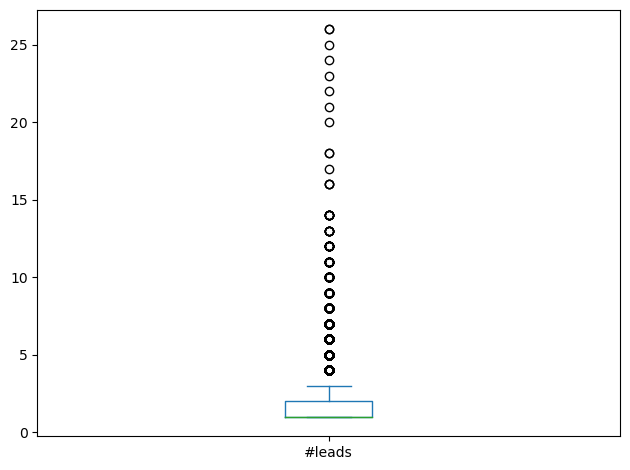

Feature name : #leads  
 Upper limit : 3.5  
 Lower limit : 0.5
----------------------------------------------------------------------------------------------------


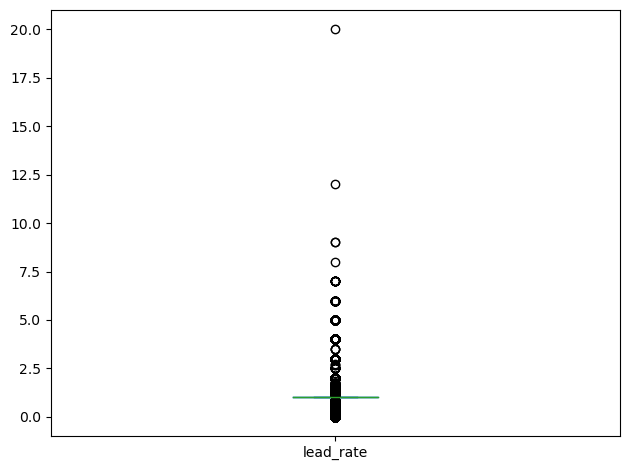

Feature name : lead_rate  
 Upper limit : 2.5  
 Lower limit : -0.5
----------------------------------------------------------------------------------------------------


In [44]:
for feature in outlier_features:
    data[feature].plot.box()
    q3 = data[feature].quantile(0.75)
    q1 = data[feature].quantile(0.25)
    iqr = q3 - q1
    upper_limit = (q3) + 1.5*(q1)
    lower_limit = (q3) - 1.5*(q1)
    plt.tight_layout()
    plt.show()
    print('Feature name : {}  \n Upper limit : {}  \n Lower limit : {}'.format(feature,upper_limit,lower_limit))
    print('-'*100)

In [45]:
data = data.loc[(data['lead_rate']<=2.5) & (data['lead_rate']>=0.0) & (data['#leads']<=3.5) & (data['#leads']>=0.5)]

In [46]:
print('-'*100)
print('Shape of the Data after Cleaning so far is ', data.shape)
print('-'*100)

----------------------------------------------------------------------------------------------------
Shape of the Data after Cleaning so far is  (48286, 34)
----------------------------------------------------------------------------------------------------


In [47]:
data = data.reset_index(drop=True)

In [48]:
data.head()

,created_at,subdomain,ext,country_code,form_type,experience,utm_source,utm_medium,is_signedup,weekday,quarter,is_weekend,is_month_start,is_month_end,is_quarter_start,is_quarter_end,#leads,lead_rate,form_1,form_6,form_7,form_2,form_3,form_4,form_5,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,buy
0,2021-01-01 10:38:59,gmail,com,91,form_2,Fresher,source_1,medium_1,True,4,1,0,True,False,True,False,1,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-01-01 11:51:01,gmail,com,91,form_4,Fresher,source_2,medium_3,False,4,1,0,True,False,True,False,1,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2021-01-01 13:21:47,gmail,com,1,form_1,Fresher,source_1,medium_1,True,4,1,0,True,False,True,False,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2021-01-01 15:23:25,gmail,com,91,form_5,Fresher,source_1,medium_1,False,4,1,0,True,False,True,False,2,2.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,2021-01-01 17:13:25,gmail,com,86,form_6,Fresher,source_3,medium_4,False,4,1,0,True,False,True,False,1,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
print('The size of Dataframe is: ', data.shape)
print('-'*100)
print('The Column Name, Record Count and Data Types are as follows: ')
data.info()
print('-'*100)

The size of Dataframe is:  (48286, 34)
----------------------------------------------------------------------------------------------------
The Column Name, Record Count and Data Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48286 entries, 0 to 48285
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   created_at        48286 non-null  datetime64[ns]
 1   subdomain         48286 non-null  object        
 2   ext               48286 non-null  object        
 3   country_code      48286 non-null  int32         
 4   form_type         48286 non-null  object        
 5   experience        48286 non-null  object        
 6   utm_source        48286 non-null  object        
 7   utm_medium        48286 non-null  object        
 8   is_signedup       48286 non-null  bool          
 9   weekday           48286 non-null  int64         
 10  quarter           48286 non-null  in

## 6. Feature Engineering

### Creating new feature vintage against dropping earlier vintage feature

In [50]:
print('-'*100)
print('Range of Date are as follows :')
print('-'*100)
data['created_at'].min(),data['created_at'].max()

----------------------------------------------------------------------------------------------------
Range of Date are as follows :
----------------------------------------------------------------------------------------------------


(Timestamp('2021-01-01 10:38:59'), Timestamp('2022-10-31 23:59:40'))

In [51]:
import datetime
from datetime import date

In [52]:
ref_date = date(2022,11,1)
ref_date

datetime.date(2022, 11, 1)

In [53]:
data['vintage'] = (ref_date - data["created_at"].dt.date).dt.days

In [54]:
data.head()

,created_at,subdomain,ext,country_code,form_type,experience,utm_source,utm_medium,is_signedup,weekday,quarter,is_weekend,is_month_start,is_month_end,is_quarter_start,is_quarter_end,#leads,lead_rate,form_1,form_6,form_7,form_2,form_3,form_4,form_5,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,buy,vintage
0,2021-01-01 10:38:59,gmail,com,91,form_2,Fresher,source_1,medium_1,True,4,1,0,True,False,True,False,1,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,669
1,2021-01-01 11:51:01,gmail,com,91,form_4,Fresher,source_2,medium_3,False,4,1,0,True,False,True,False,1,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,669
2,2021-01-01 13:21:47,gmail,com,1,form_1,Fresher,source_1,medium_1,True,4,1,0,True,False,True,False,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,669
3,2021-01-01 15:23:25,gmail,com,91,form_5,Fresher,source_1,medium_1,False,4,1,0,True,False,True,False,2,2.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,669
4,2021-01-01 17:13:25,gmail,com,86,form_6,Fresher,source_3,medium_4,False,4,1,0,True,False,True,False,1,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,669


In [217]:
data['vintage'].value_counts(normalize=True)

439    0.004680
399    0.004121
438    0.004101
503    0.004059
469    0.004059
175    0.004018
466    0.004018
376    0.003914
580    0.003893
138    0.003728
331    0.003686
353    0.003666
327    0.003645
583    0.003583
90     0.003583
147    0.003562
57     0.003417
146    0.003396
140    0.003376
355    0.003272
370    0.003251
585    0.003251
405    0.003189
281    0.003189
223    0.003189
584    0.003148
427    0.003148
206    0.003148
292    0.003127
467    0.003106
400    0.003106
120    0.003065
502    0.003024
377    0.003003
62     0.003003
428    0.002982
517    0.002962
330    0.002962
404    0.002941
172    0.002941
196    0.002920
579    0.002899
61     0.002899
321    0.002899
264    0.002837
473    0.002817
369    0.002817
371    0.002817
193    0.002796
32     0.002796
575    0.002796
122    0.002796
252    0.002796
168    0.002775
286    0.002775
375    0.002775
251    0.002754
205    0.002734
92     0.002734
284    0.002734
374    0.002713
431    0.002692
378    0

### Extracting sub-components of Dates

In [55]:
data['Created_at_Year'] = data['created_at'].dt.year
data['Created_at_Month'] = data['created_at'].dt.month
data['Created_at_Date'] = data['created_at'].dt.day
data['Created_at_Time'] = data['created_at'].dt.time

In [56]:
data['Created_at_Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [57]:
month_names = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',\
               10:'October',11:'November',12:'December'}

data['Created_at_Month'] = data['Created_at_Month'].map(month_names)

In [58]:
data['weekday'].unique()

array([4, 5, 6, 0, 1, 2, 3], dtype=int64)

In [59]:
week_names = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

data['weekday'] = data['weekday'].map(week_names)

In [60]:
data.head()

,created_at,subdomain,ext,country_code,form_type,experience,utm_source,utm_medium,is_signedup,weekday,quarter,is_weekend,is_month_start,is_month_end,is_quarter_start,is_quarter_end,#leads,lead_rate,form_1,form_6,form_7,form_2,form_3,form_4,form_5,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,buy,vintage,Created_at_Year,Created_at_Month,Created_at_Date,Created_at_Time
0,2021-01-01 10:38:59,gmail,com,91,form_2,Fresher,source_1,medium_1,True,Friday,1,0,True,False,True,False,1,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,669,2021,January,1,10:38:59
1,2021-01-01 11:51:01,gmail,com,91,form_4,Fresher,source_2,medium_3,False,Friday,1,0,True,False,True,False,1,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,669,2021,January,1,11:51:01
2,2021-01-01 13:21:47,gmail,com,1,form_1,Fresher,source_1,medium_1,True,Friday,1,0,True,False,True,False,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,669,2021,January,1,13:21:47
3,2021-01-01 15:23:25,gmail,com,91,form_5,Fresher,source_1,medium_1,False,Friday,1,0,True,False,True,False,2,2.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,669,2021,January,1,15:23:25
4,2021-01-01 17:13:25,gmail,com,86,form_6,Fresher,source_3,medium_4,False,Friday,1,0,True,False,True,False,1,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,669,2021,January,1,17:13:25


In [61]:
data.drop('created_at',axis=1,inplace=True)

In [62]:
print('The size of Dataframe is: ', data.shape)
print('-'*100)
print('The Column Name, Record Count and Data Types are as follows: ')
data.info()
print('-'*100)

The size of Dataframe is:  (48286, 38)
----------------------------------------------------------------------------------------------------
The Column Name, Record Count and Data Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48286 entries, 0 to 48285
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subdomain         48286 non-null  object 
 1   ext               48286 non-null  object 
 2   country_code      48286 non-null  int32  
 3   form_type         48286 non-null  object 
 4   experience        48286 non-null  object 
 5   utm_source        48286 non-null  object 
 6   utm_medium        48286 non-null  object 
 7   is_signedup       48286 non-null  bool   
 8   weekday           48286 non-null  object 
 9   quarter           48286 non-null  int64  
 10  is_weekend        48286 non-null  int64  
 11  is_month_start    48286 non-null  bool   
 12  is_month_end      48286 no

### Dropping form_type column

In [63]:
data.drop('form_type',axis=1,inplace=True)

In [64]:
print('-'*100)
print('Shape of the Data after Cleaning so far is ', data.shape)
print('-'*100)

----------------------------------------------------------------------------------------------------
Shape of the Data after Cleaning so far is  (48286, 37)
----------------------------------------------------------------------------------------------------


In [65]:
data['Created_at_Year'] = pd.Categorical(data['Created_at_Year'],categories=[2021,2022], ordered=True)

data['Created_at_Month'] = pd.Categorical(data['Created_at_Month'],categories=['January','February','March','April','May',\
                                                                               'June','July','August','September','October',\
                                                                               'November','December'], ordered=True)

data['quarter'] = pd.Categorical(data['quarter'],categories=[1,2,3,4], ordered=True)

data['weekday'] = pd.Categorical(data['weekday'],categories=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday',\
                                                             'Saturday','Sunday'], ordered=True)

In [66]:
order_update = ['Created_at_Year','Created_at_Month','Created_at_Date','Created_at_Time','quarter','weekday',\
                'is_weekend','is_month_start','is_month_end','is_quarter_start','is_quarter_end','experience',\
                'is_signedup','country_code','utm_source','utm_medium','subdomain','ext','vintage',\
                '#leads','lead_rate','form_1','form_2','form_3','form_4','form_5','form_6','form_7','form_8',\
                'form_9','form_10','form_11','form_12','form_13','form_14','form_15','buy']

In [67]:
data = data.reindex(columns=order_update)

data.head()

,Created_at_Year,Created_at_Month,Created_at_Date,Created_at_Time,quarter,weekday,is_weekend,is_month_start,is_month_end,is_quarter_start,is_quarter_end,experience,is_signedup,country_code,utm_source,utm_medium,subdomain,ext,vintage,#leads,lead_rate,form_1,form_2,form_3,form_4,form_5,form_6,form_7,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,buy
0,2021,January,1,10:38:59,1,Friday,0,True,False,True,False,Fresher,True,91,source_1,medium_1,gmail,com,669,1,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2021,January,1,11:51:01,1,Friday,0,True,False,True,False,Fresher,False,91,source_2,medium_3,gmail,com,669,1,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2021,January,1,13:21:47,1,Friday,0,True,False,True,False,Fresher,True,1,source_1,medium_1,gmail,com,669,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2021,January,1,15:23:25,1,Friday,0,True,False,True,False,Fresher,False,91,source_1,medium_1,gmail,com,669,2,2.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2021,January,1,17:13:25,1,Friday,0,True,False,True,False,Fresher,False,86,source_3,medium_4,gmail,com,669,1,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [69]:
print('The size of Dataframe is: ', data.shape)
print('-'*100)
print('The Column Name, Record Count and Data Types are as follows: ')
data.info()
print('-'*100)

The size of Dataframe is:  (48286, 37)
----------------------------------------------------------------------------------------------------
The Column Name, Record Count and Data Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48286 entries, 0 to 48285
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Created_at_Year   48286 non-null  category
 1   Created_at_Month  48286 non-null  category
 2   Created_at_Date   48286 non-null  int64   
 3   Created_at_Time   48286 non-null  object  
 4   quarter           48286 non-null  category
 5   weekday           48286 non-null  category
 6   is_weekend        48286 non-null  int64   
 7   is_month_start    48286 non-null  bool    
 8   is_month_end      48286 non-null  bool    
 9   is_quarter_start  48286 non-null  bool    
 10  is_quarter_end    48286 non-null  bool    
 11  experience        48286 non-null  object  
 12  is_signedup 

## 7. Exploratory Data Analysis (EDA)

### 5.1 Univariate Analysis

It is the simplest form of analyzing data where we examine each variable individually. For categorical features, we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable.

#### Target variable (buy)

In [81]:
data['buy'].value_counts()

0    47597
1      689
Name: buy, dtype: int64

In [80]:
data['buy'].value_counts(normalize=True)

0    0.985731
1    0.014269
Name: buy, dtype: float64

0    0.985731
1    0.014269
Name: buy, dtype: float64

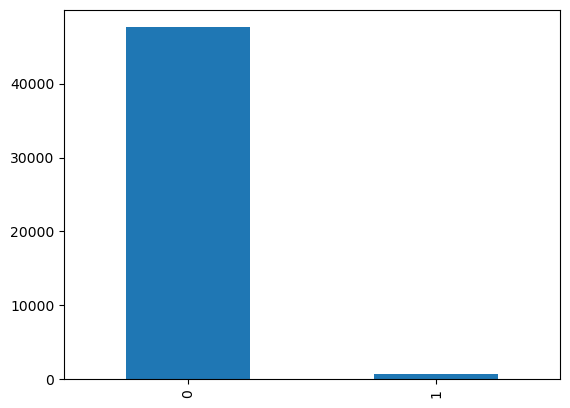

In [78]:
data['buy'].value_counts().plot.bar()

##### Inference
**98.3597%** have not bought any product i.e. **Only 1.64%** leads are successful.

#### Problem of Data Imbalance

In [ ]:
 # Checking total leads Year wise & relation of lead conversion with Years.

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
fig1 = data['Created_at_Year'].value_counts().plot(kind='bar')
for bar in fig1.patches:
    fig1.annotate(f"{fig1.get_height()}", (fig1.get_x() + fig1.get_width() / 2, fig1.get_height()),
                  ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                  textcoords='offset points')
plt.title('Total leads - Year wise')
plt.xlabel('Years')
plt.ylabel('Count of leads')
plt.xticks(rotation = 70)

plt.subplot(1,2,2)
fig2 = sns.countplot(x='Created_at_Year',data=data,hue='buy')
for bar in fig2.patches:
    fig2.annotate(f"{fig2.get_height()}", (fig2.get_x() + fig2.get_width() / 2, fig2.get_height()),
                  ha='center', va='center', fontsize=13, color='black', xytext=(0, 5),
                  textcoords='offset points')
plt.title('Relation of lead conversion wrt Years')
plt.xlabel('Years')
plt.ylabel('Count of leads')
plt.show()

#### Categorical Variable(Independent)

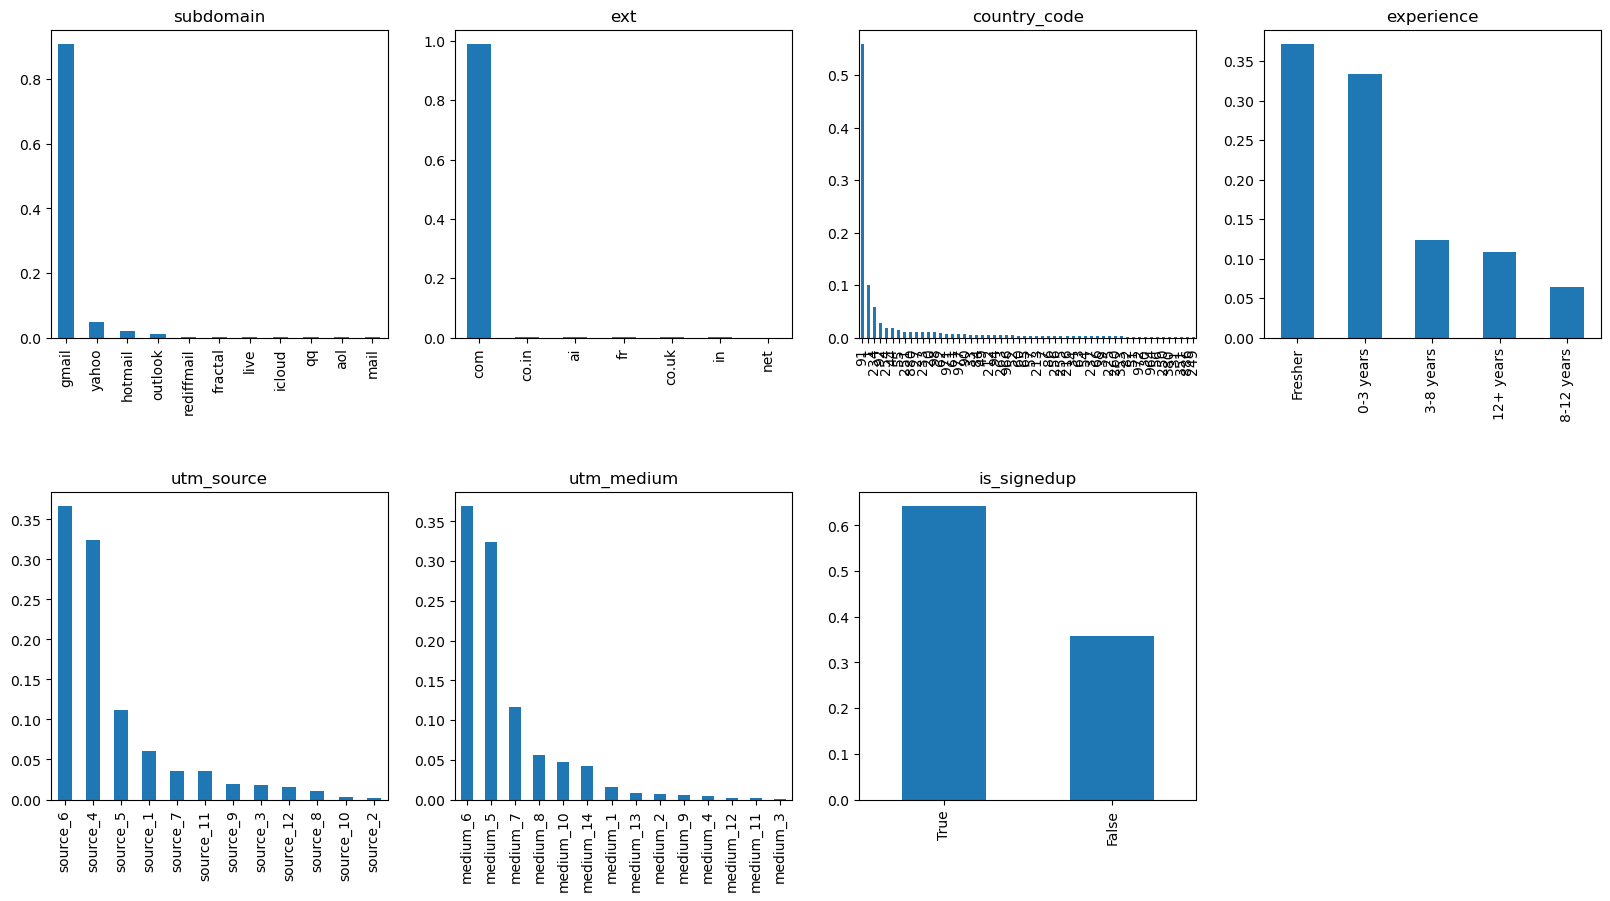

In [84]:
plt.figure(1)
plt.subplot(241)
data['subdomain'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='subdomain')
plt.subplot(242)
data['ext'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='ext')
plt.subplot(243)
data['country_code'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='country_code')
plt.subplot(244)
data['experience'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='experience')
plt.subplot(245)
data['utm_source'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='utm_source')
plt.subplot(246)
data['utm_medium'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='utm_medium')
plt.subplot(247)
data['is_signedup'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='is_signedup')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

##### Inference

- **~ 82%** are  gmail users. Also, there might be typo error in gamil
- **~ 93%** are .com users
- **~ 51%** are from country_code 91 (India) and **~ 10%** from country code 1(USA)
- **~ 34%** users from form_6, **~ 17%** from form_7, **~ 14%** from form_, **~ 12%** from form_12, **~ 7%** from form_5 and **~ 6%** from form_3
- **~ 37%** users are Fresher, **~ 33%** are 0-3 years experience, **~ 12%** are 3-8 years experience and **~ 11%** are 12+ years experience
- **~ 36%** users are from source_6, **~ 33%** users are from source_4 and **~ 11%** users are from source_5 
- **~ 36%** users are from medium_6, **~ 33%** users are from medium_5 and **~ 11%** users are from medium_7
- **~ 60%** users are signedup users.

#### Numerical Variable(Independent)

In [86]:
data['vintage'].value_counts(normalize=True,ascending=False)

439    0.004680
399    0.004121
438    0.004101
503    0.004059
469    0.004059
175    0.004018
466    0.004018
376    0.003914
580    0.003893
138    0.003728
331    0.003686
353    0.003666
327    0.003645
583    0.003583
90     0.003583
147    0.003562
57     0.003417
146    0.003396
140    0.003376
355    0.003272
370    0.003251
585    0.003251
405    0.003189
281    0.003189
223    0.003189
584    0.003148
427    0.003148
206    0.003148
292    0.003127
467    0.003106
400    0.003106
120    0.003065
502    0.003024
377    0.003003
62     0.003003
428    0.002982
517    0.002962
330    0.002962
404    0.002941
172    0.002941
196    0.002920
579    0.002899
61     0.002899
321    0.002899
264    0.002837
473    0.002817
369    0.002817
371    0.002817
193    0.002796
32     0.002796
575    0.002796
122    0.002796
252    0.002796
168    0.002775
286    0.002775
375    0.002775
251    0.002754
205    0.002734
92     0.002734
284    0.002734
374    0.002713
431    0.002692
378    0

##### Inference



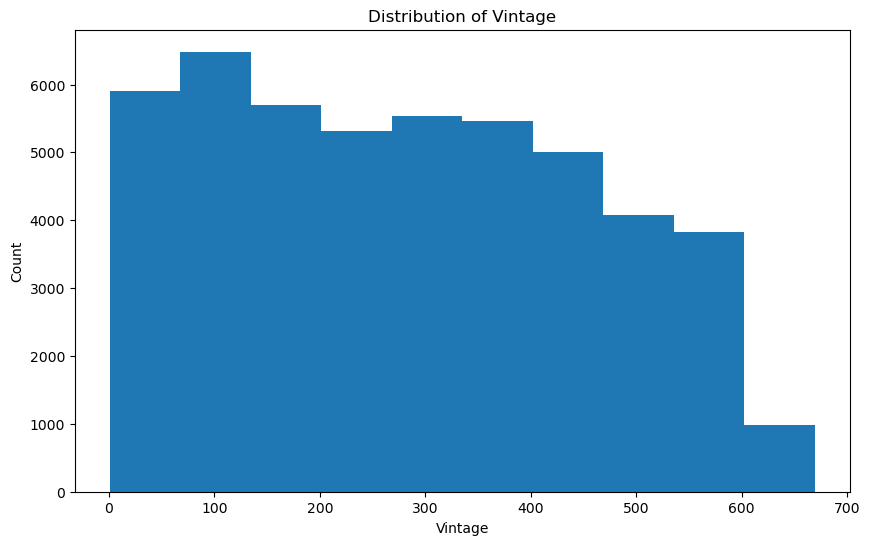

In [87]:
plt.figure(figsize=(10, 6))
plt.hist(data['vintage'], bins=10)
plt.xlabel('Vintage')
plt.ylabel('Count')
plt.title('Distribution of Vintage')
plt.show()

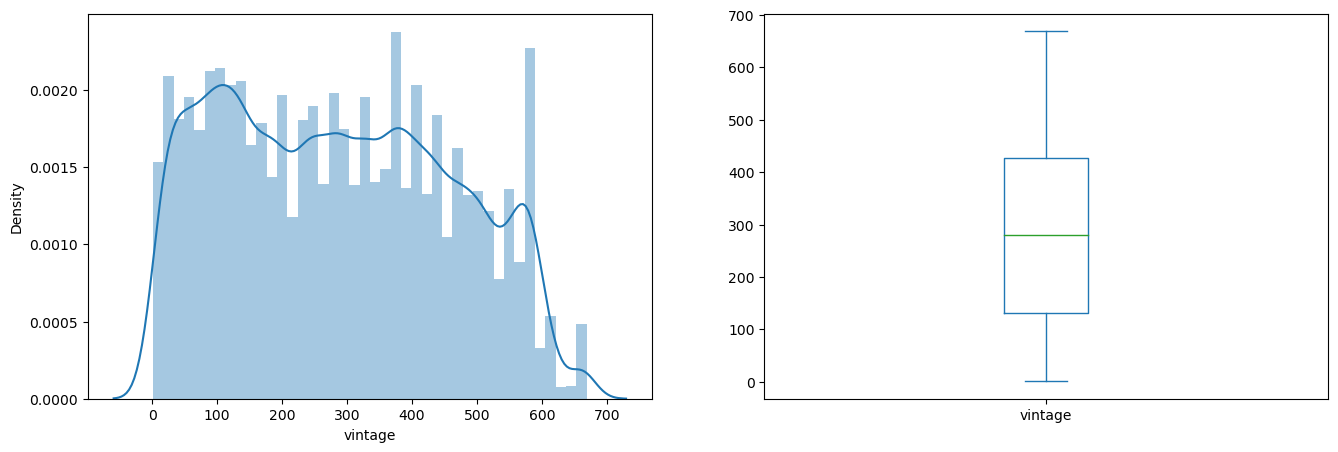

In [88]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['vintage'])
plt.subplot(122)
data['vintage'].plot.box(figsize=(16,5))
plt.show()

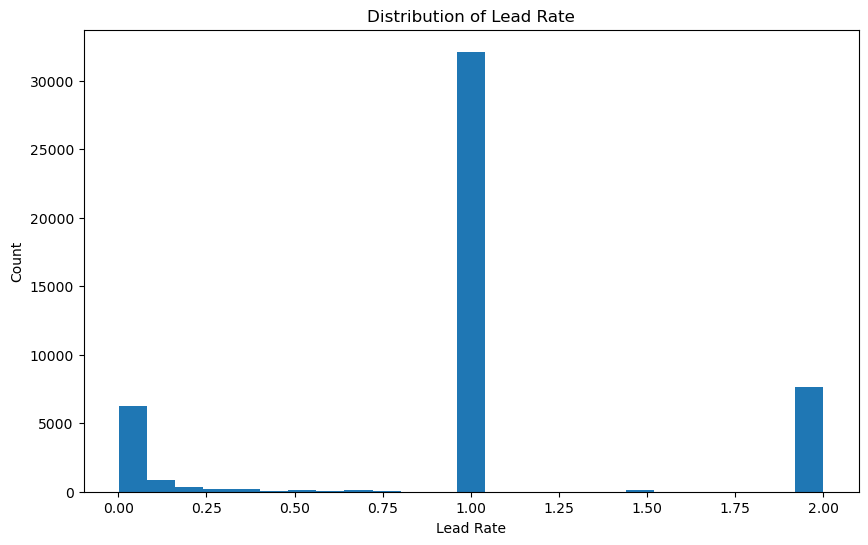

In [89]:
plt.figure(figsize=(10, 6))
plt.hist(data['lead_rate'], bins=25)
plt.xlabel('Lead Rate')
plt.ylabel('Count')
plt.title('Distribution of Lead Rate')
plt.show()

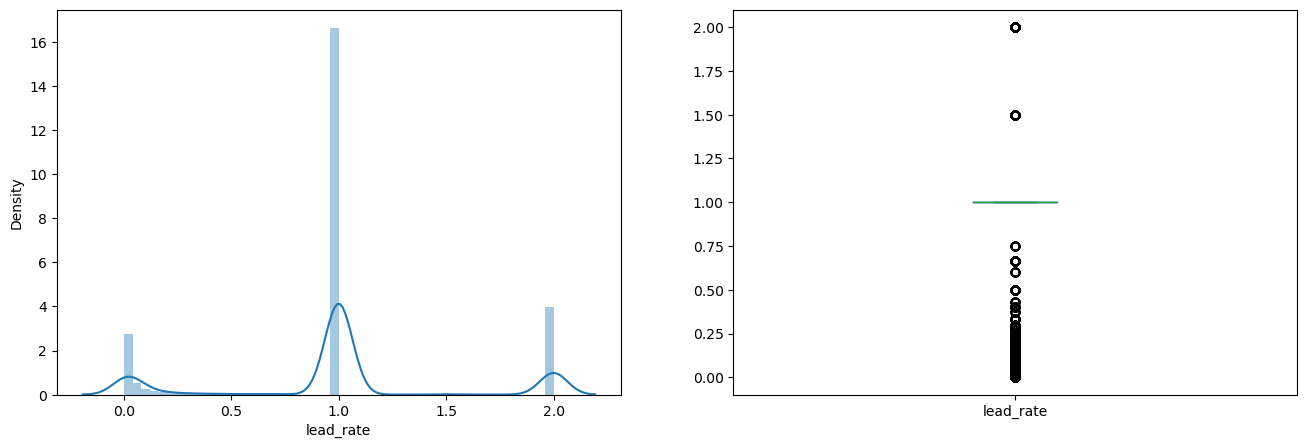

In [90]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['lead_rate'])
plt.subplot(122)
data['lead_rate'].plot.box(figsize=(16,5))
plt.show()

##### Inference



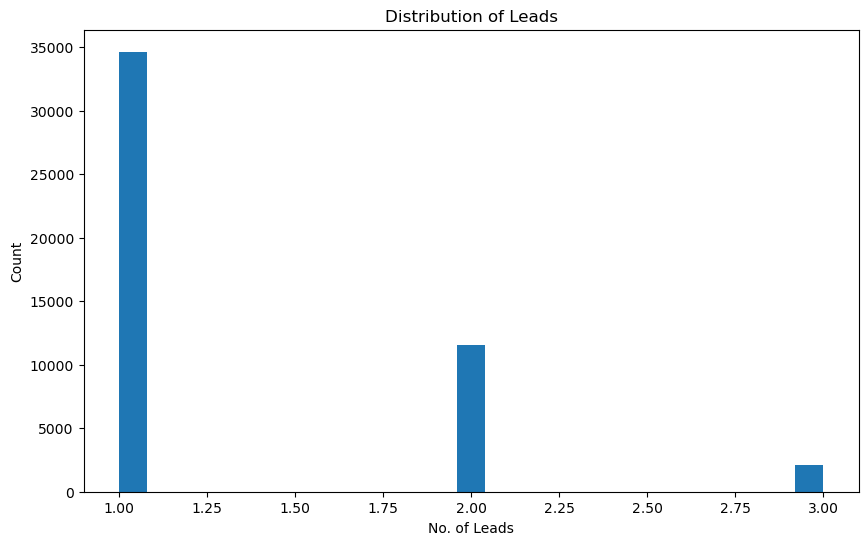

In [91]:
plt.figure(figsize=(10, 6))
plt.hist(data['#leads'], bins=25)
plt.xlabel('No. of Leads')
plt.ylabel('Count')
plt.title('Distribution of Leads')
plt.show()

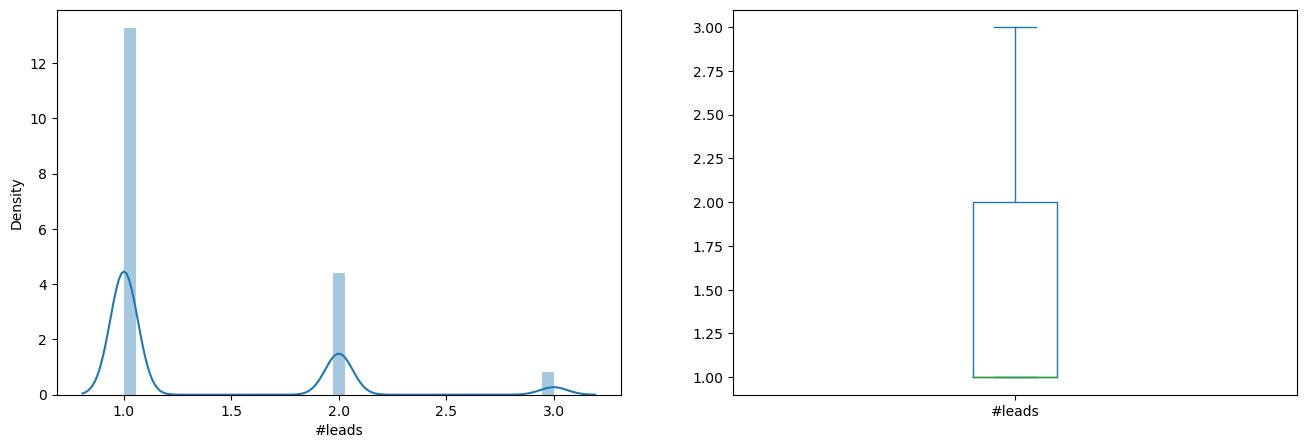

In [92]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['#leads'])
plt.subplot(122)
data['#leads'].plot.box(figsize=(16,5))
plt.show()

##### Inference


### 5.2 Bivariate Analysis

#### Categorical Independent Variable Vs Target Variable


In [93]:
Subdomain= pd.crosstab(data['subdomain'],data['buy'])
Subdomain

buy,0,1
subdomain,,
aol,63,0
fractal,151,0
gmail,43200,635
hotmail,933,8
icloud,102,0
live,113,0
mail,49,0
outlook,534,9
qq,80,0


In [94]:
Subdomain.div(Subdomain.sum(1).astype(float), axis=0)

buy,0,1
subdomain,,
aol,1.000000,0.000000
fractal,1.000000,0.000000
gmail,0.985514,0.014486
hotmail,0.991498,0.008502
icloud,1.000000,0.000000
live,1.000000,0.000000
mail,1.000000,0.000000
outlook,0.983425,0.016575
qq,1.000000,0.000000


<AxesSubplot:xlabel='subdomain'>

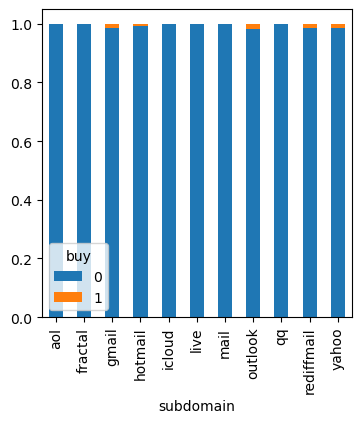

In [95]:
Subdomain.div(Subdomain.sum(1).astype(float), axis=0).plot(kind= "bar", stacked= True, figsize=(4,4))

##### Inference 

<AxesSubplot:xlabel='utm_medium'>

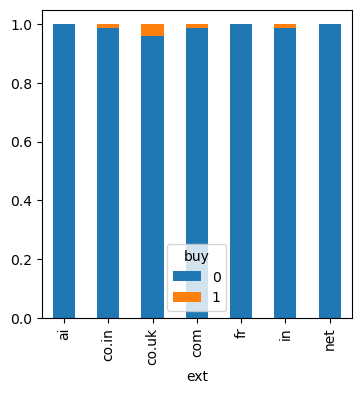

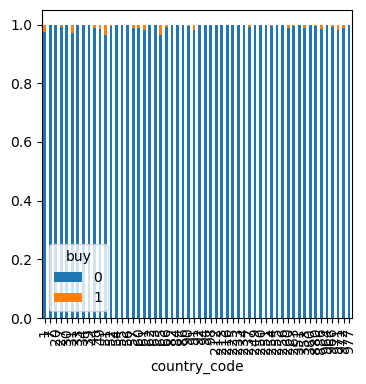

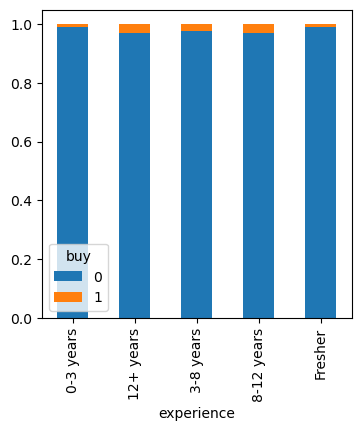

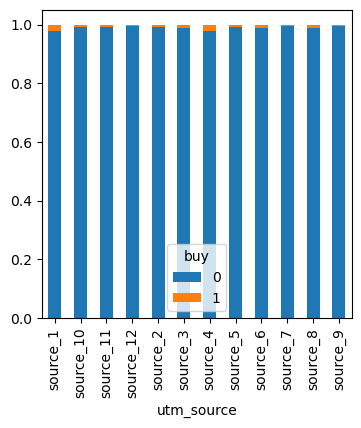

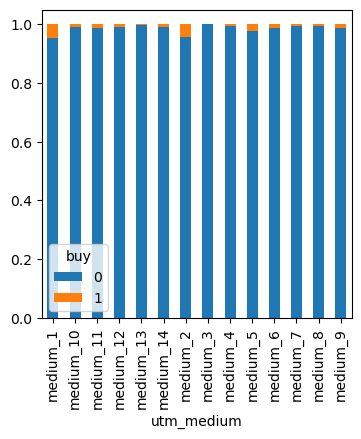

In [97]:
Ext = pd.crosstab(data['ext'],data['buy'])
Country_code = pd.crosstab(data['country_code'],data['buy'])
Experience = pd.crosstab(data['experience'],data['buy'])
Utm_source =pd.crosstab(data['utm_source'],data['buy'])
Utm_medium = pd.crosstab(data['utm_medium'],data['buy'])
SignUp =pd.crosstab(data['is_signedup'],data['buy'])

Ext.div(Ext.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Country_code.div(Country_code.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Experience.div(Experience.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Utm_source.div(Utm_source.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Utm_medium.div(Utm_medium.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

##### Inference

#### Numerical Independent Variable Vs Target Variable


<AxesSubplot:xlabel='buy'>

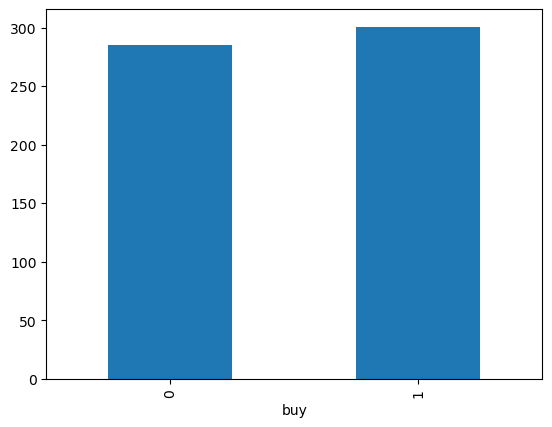

In [98]:
data.groupby('buy')['vintage'].mean().plot.bar()

##### Inference 

<AxesSubplot:xlabel='buy'>

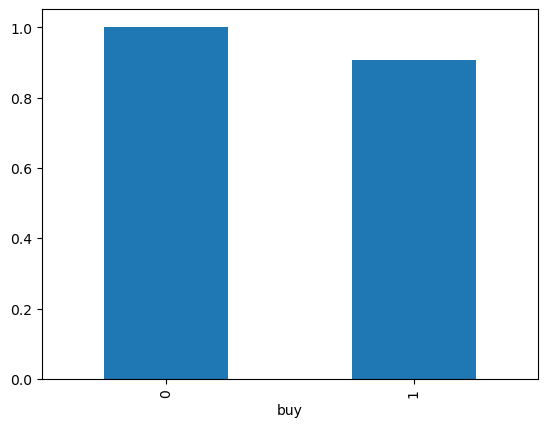

In [99]:
data.groupby('buy')['lead_rate'].mean().plot.bar()

<AxesSubplot:xlabel='buy'>

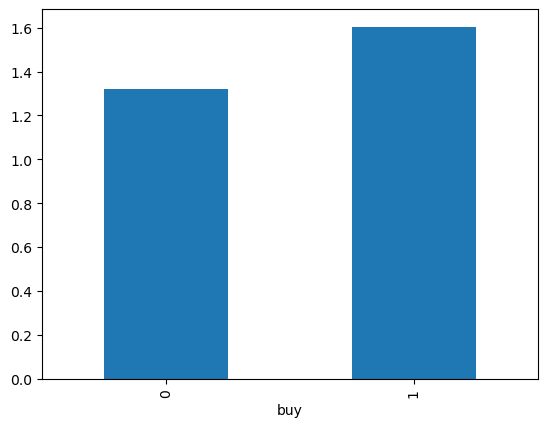

In [100]:
data.groupby('buy')['#leads'].mean().plot.bar()

##### Inference

<AxesSubplot:>

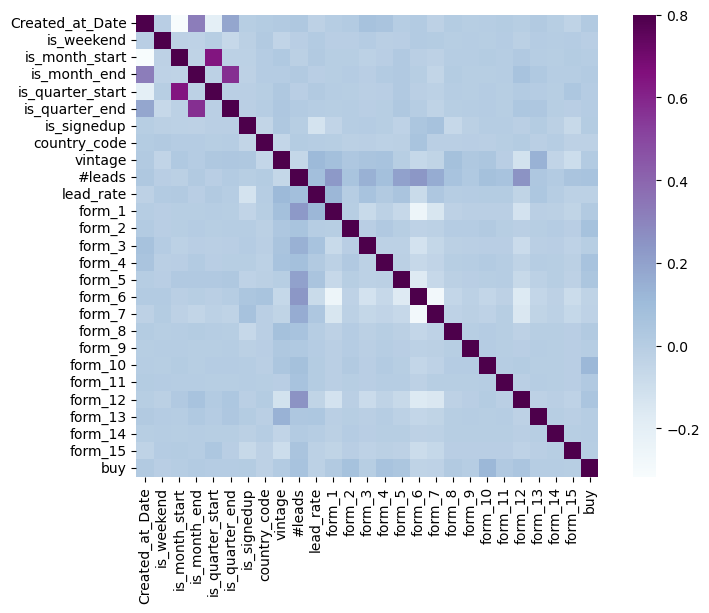

In [101]:
matrix=data.corr()
ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=0.8, square=True, cmap="BuPu")

# 8. Data Visulization

### Year wise Lead Generation

In [105]:
year_wise_lead = pd.crosstab(data['Created_at_Year'],data['buy'])
year_wise_lead

buy,0,1
Created_at_Year,,
2021,21536,354
2022,26061,335


In [110]:
year_wise_lead.div(year_wise_lead.sum(axis=1), axis=0) * 100

buy,0,1
Created_at_Year,,
2021,98.382823,1.617177
2022,98.730868,1.269132


Text(0, 0.5, 'Count of leads')

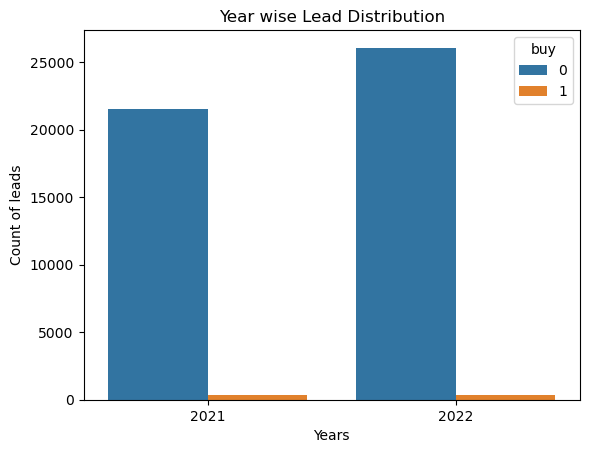

In [121]:
sns.countplot(x='Created_at_Year',data=data,hue='buy')
plt.title('Year wise Lead Distribution')
plt.xlabel('Years')
plt.ylabel('Count of leads')

### Monthwise Lead Generation

In [116]:
month_wise_lead = pd.crosstab(data['Created_at_Month'],data['buy'])
month_wise_lead

buy,0,1
Created_at_Month,,
January,3151,45
February,2316,35
March,4008,55
April,4332,46
May,3827,47
June,4594,72
July,5228,89
August,5231,75
September,4996,64


In [117]:
month_wise_lead.div(month_wise_lead.sum(axis=1), axis=0) * 100

buy,0,1
Created_at_Month,,
January,98.591990,1.408010
February,98.511272,1.488728
March,98.646320,1.353680
April,98.949292,1.050708
May,98.786784,1.213216
June,98.456922,1.543078
July,98.326124,1.673876
August,98.586506,1.413494
September,98.735178,1.264822


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

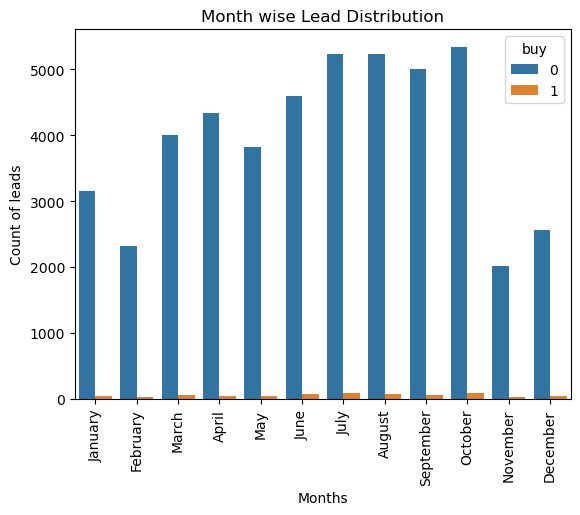

In [120]:
sns.countplot(x='Created_at_Month',data=data,hue='buy')
plt.title('Month wise Lead Distribution')
plt.xlabel('Months')
plt.ylabel('Count of leads')
plt.xticks(rotation = 90)

### Date wise Lead Generation

In [125]:
date_wise_lead = pd.crosstab(data['Created_at_Date'],data['buy'])
date_wise_lead

buy,0,1
Created_at_Date,,
1,1549,24
2,1559,13
3,1503,25
4,1402,23
5,1535,21
6,1453,18
7,1428,28
8,1263,18
9,1355,17


In [126]:
date_wise_lead.div(date_wise_lead.sum(axis=1), axis=0) * 100

buy,0,1
Created_at_Date,,
1,98.474253,1.525747
2,99.173028,0.826972
3,98.363874,1.636126
4,98.385965,1.614035
5,98.650386,1.349614
6,98.776343,1.223657
7,98.076923,1.923077
8,98.594848,1.405152
9,98.760933,1.239067


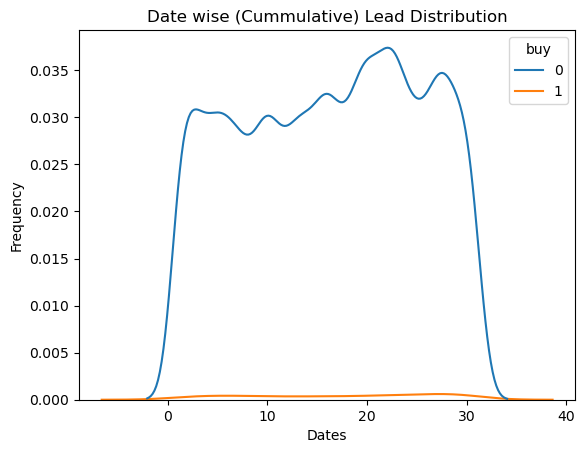

In [123]:
sns.kdeplot(x='Created_at_Date',data=data,hue='buy')
plt.title('Date wise (Cummulative) Lead Distribution')
plt.xlabel('Dates')
plt.ylabel('Frequency')
plt.show()

### Quarter wise Lead Generation

In [127]:
quarter_wise_lead = pd.crosstab(data['quarter'],data['buy'])
quarter_wise_lead

buy,0,1
quarter,,
1,9475,135
2,12753,165
3,15455,228
4,9914,161


In [128]:
quarter_wise_lead.div(quarter_wise_lead.sum(axis=1), axis=0) * 100

buy,0,1
quarter,,
1,98.595213,1.404787
2,98.722712,1.277288
3,98.546197,1.453803
4,98.401985,1.598015


Text(0, 0.5, 'Count of leads')

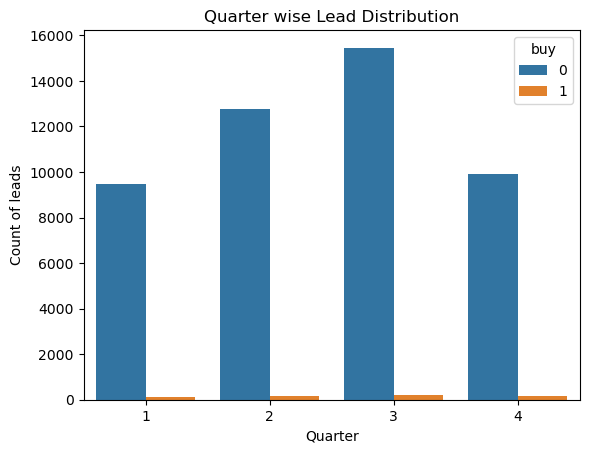

In [129]:
sns.countplot(x='quarter',data=data,hue='buy')
plt.title('Quarter wise Lead Distribution')
plt.xlabel('Quarter')
plt.ylabel('Count of leads')

### Weekday Lead Generation

In [130]:
weekday_wise_lead = pd.crosstab(data['weekday'],data['buy'])
weekday_wise_lead

buy,0,1
weekday,,
Monday,6874,99
Tuesday,7197,118
Wednesday,7517,111
Thursday,7457,91
Friday,7249,129
Saturday,6023,73
Sunday,5280,68


In [131]:
weekday_wise_lead.div(weekday_wise_lead.sum(axis=1), axis=0) * 100

buy,0,1
weekday,,
Monday,98.580238,1.419762
Tuesday,98.386876,1.613124
Wednesday,98.544835,1.455165
Thursday,98.794383,1.205617
Friday,98.251559,1.748441
Saturday,98.802493,1.197507
Sunday,98.728497,1.271503


Text(0, 0.5, 'Count of leads')

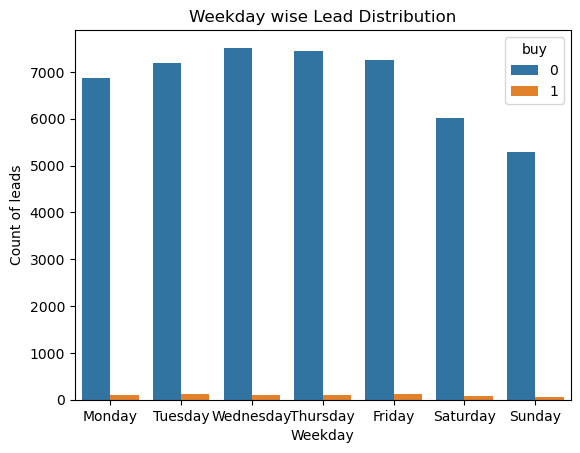

In [132]:
sns.countplot(x='weekday',data=data,hue='buy')
plt.title('Weekday wise Lead Distribution')
plt.xlabel('Weekday')
plt.ylabel('Count of leads')

### Weekend Lead Generation

In [133]:
weekend_lead = pd.crosstab(data['is_weekend'],data['buy'])
weekend_lead

buy,0,1
is_weekend,,
0,36294,548
1,11303,141


In [134]:
weekend_lead.div(weekend_lead.sum(axis=1), axis=0) * 100

buy,0,1
is_weekend,,
0,98.512567,1.487433
1,98.767913,1.232087


Text(0, 0.5, 'Count of leads')

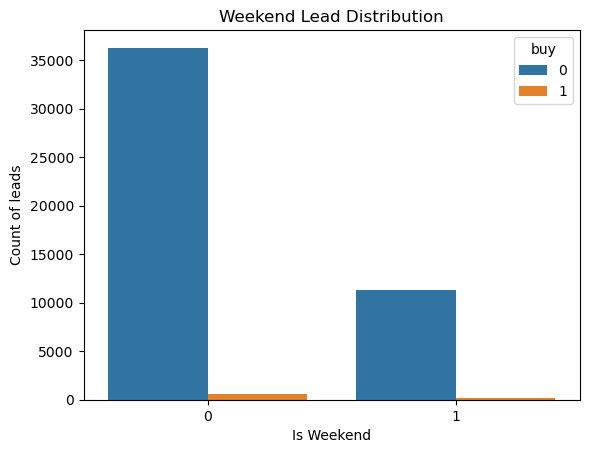

In [135]:
sns.countplot(x='is_weekend',data=data,hue='buy')
plt.title('Weekend Lead Distribution')
plt.xlabel('Is Weekend')
plt.ylabel('Count of leads')

### Signed Up Lead Generation

In [136]:
signed_up_lead = pd.crosstab(data['is_signedup'],data['buy'])
signed_up_lead

buy,0,1
is_signedup,,
False,17063,219
True,30534,470


In [137]:
signed_up_lead.div(signed_up_lead.sum(axis=1), axis=0) * 100

buy,0,1
is_signedup,,
False,98.732786,1.267214
True,98.484067,1.515933


Text(0, 0.5, 'Count of leads')

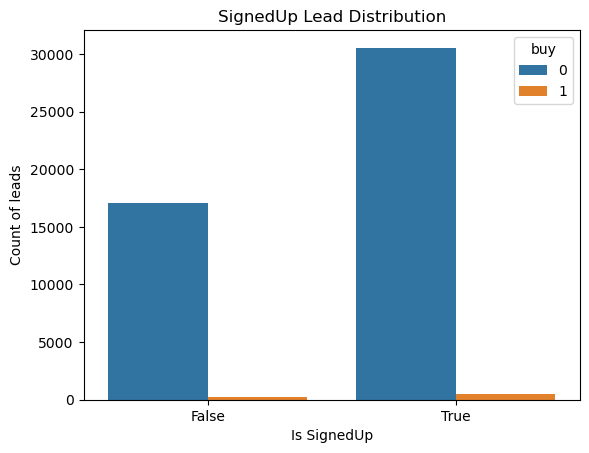

In [138]:
sns.countplot(x='is_signedup',data=data,hue='buy')
plt.title('SignedUp Lead Distribution')
plt.xlabel('Is SignedUp')
plt.ylabel('Count of leads')

### Experience wise Lead Generation

In [139]:
experience_wise_lead = pd.crosstab(data['experience'],data['buy'])
experience_wise_lead

buy,0,1
experience,,
0-3 years,15931,159
12+ years,5085,159
3-8 years,5806,142
8-12 years,2984,92
Fresher,17791,137


In [140]:
experience_wise_lead.div(experience_wise_lead.sum(axis=1), axis=0) * 100

buy,0,1
experience,,
0-3 years,99.011809,0.988191
12+ years,96.967963,3.032037
3-8 years,97.612643,2.387357
8-12 years,97.009103,2.990897
Fresher,99.235832,0.764168


Text(0, 0.5, 'Count of leads')

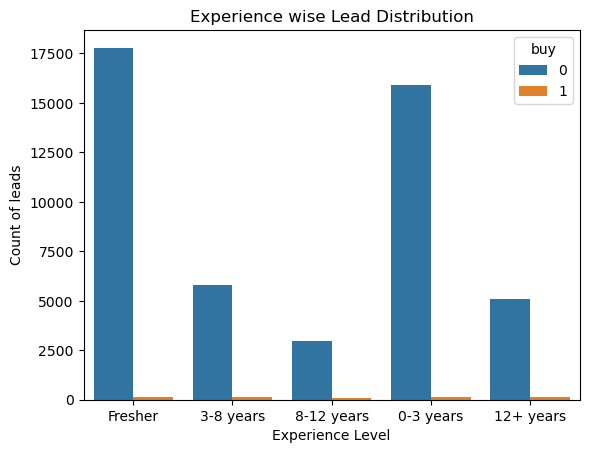

In [141]:
sns.countplot(x='experience',data=data,hue='buy')
plt.title('Experience wise Lead Distribution')
plt.xlabel('Experience Level')
plt.ylabel('Count of leads')

### Source wise Lead Generation

In [142]:
source_wise_lead = pd.crosstab(data['utm_source'],data['buy'])
source_wise_lead

buy,0,1
utm_source,,
source_1,2840,61
source_10,130,1
source_11,1700,12
source_12,723,4
source_2,102,1
source_3,839,9
source_4,15319,331
source_5,5344,36
source_6,17468,218


In [143]:
source_wise_lead.div(source_wise_lead.sum(axis=1), axis=0) * 100

buy,0,1
utm_source,,
source_1,97.897277,2.102723
source_10,99.236641,0.763359
source_11,99.299065,0.700935
source_12,99.449794,0.550206
source_2,99.029126,0.970874
source_3,98.938679,1.061321
source_4,97.884984,2.115016
source_5,99.330855,0.669145
source_6,98.767387,1.232613


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'source_1'),
  Text(1, 0, 'source_2'),
  Text(2, 0, 'source_3'),
  Text(3, 0, 'source_4'),
  Text(4, 0, 'source_5'),
  Text(5, 0, 'source_6'),
  Text(6, 0, 'source_7'),
  Text(7, 0, 'source_9'),
  Text(8, 0, 'source_8'),
  Text(9, 0, 'source_10'),
  Text(10, 0, 'source_11'),
  Text(11, 0, 'source_12')])

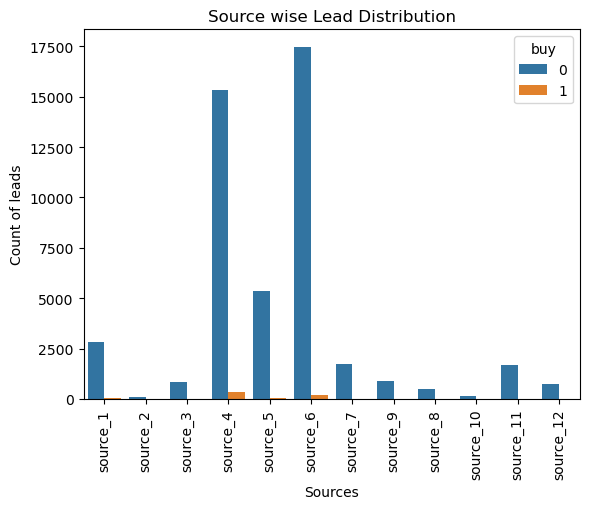

In [145]:
sns.countplot(x='utm_source',data=data,hue='buy')
plt.title('Source wise Lead Distribution')
plt.xlabel('Sources')
plt.ylabel('Count of leads')
plt.xticks(rotation = 90)

### Medium wise Lead Generation

In [146]:
medium_wise_lead = pd.crosstab(data['utm_medium'],data['buy'])
medium_wise_lead

buy,0,1
utm_medium,,
medium_1,732,36
medium_10,2244,21
medium_11,78,1
medium_12,121,1
medium_13,387,1
medium_14,2036,15
medium_2,299,13
medium_3,19,0
medium_4,200,1


In [147]:
medium_wise_lead.div(medium_wise_lead.sum(axis=1), axis=0) * 100

buy,0,1
utm_medium,,
medium_1,95.312500,4.687500
medium_10,99.072848,0.927152
medium_11,98.734177,1.265823
medium_12,99.180328,0.819672
medium_13,99.742268,0.257732
medium_14,99.268649,0.731351
medium_2,95.833333,4.166667
medium_3,100.000000,0.000000
medium_4,99.502488,0.497512


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'medium_1'),
  Text(1, 0, 'medium_3'),
  Text(2, 0, 'medium_4'),
  Text(3, 0, 'medium_5'),
  Text(4, 0, 'medium_2'),
  Text(5, 0, 'medium_6'),
  Text(6, 0, 'medium_7'),
  Text(7, 0, 'medium_8'),
  Text(8, 0, 'medium_10'),
  Text(9, 0, 'medium_9'),
  Text(10, 0, 'medium_11'),
  Text(11, 0, 'medium_12'),
  Text(12, 0, 'medium_13'),
  Text(13, 0, 'medium_14')])

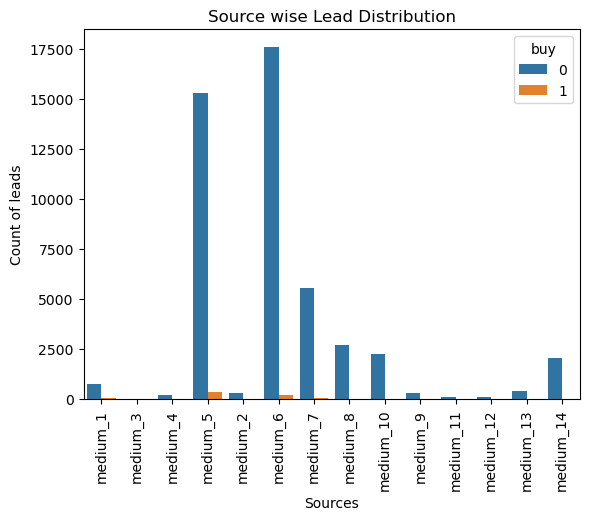

In [148]:
sns.countplot(x='utm_medium',data=data,hue='buy')
plt.title('Source wise Lead Distribution')
plt.xlabel('Sources')
plt.ylabel('Count of leads')
plt.xticks(rotation = 90)

### Subdomain wise Lead Generation

In [151]:
subdomain_wise_lead = pd.crosstab(data['subdomain'],data['buy'])
subdomain_wise_lead

buy,0,1
subdomain,,
aol,63,0
fractal,151,0
gmail,43200,635
hotmail,933,8
icloud,102,0
live,113,0
mail,49,0
outlook,534,9
qq,80,0


In [152]:
subdomain_wise_lead.div(subdomain_wise_lead.sum(axis=1), axis=0) * 100

buy,0,1
subdomain,,
aol,100.000000,0.000000
fractal,100.000000,0.000000
gmail,98.551386,1.448614
hotmail,99.149841,0.850159
icloud,100.000000,0.000000
live,100.000000,0.000000
mail,100.000000,0.000000
outlook,98.342541,1.657459
qq,100.000000,0.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'gmail'),
  Text(1, 0, 'yahoo'),
  Text(2, 0, 'hotmail'),
  Text(3, 0, 'outlook'),
  Text(4, 0, 'aol'),
  Text(5, 0, 'live'),
  Text(6, 0, 'rediffmail'),
  Text(7, 0, 'mail'),
  Text(8, 0, 'icloud'),
  Text(9, 0, 'qq'),
  Text(10, 0, 'fractal')])

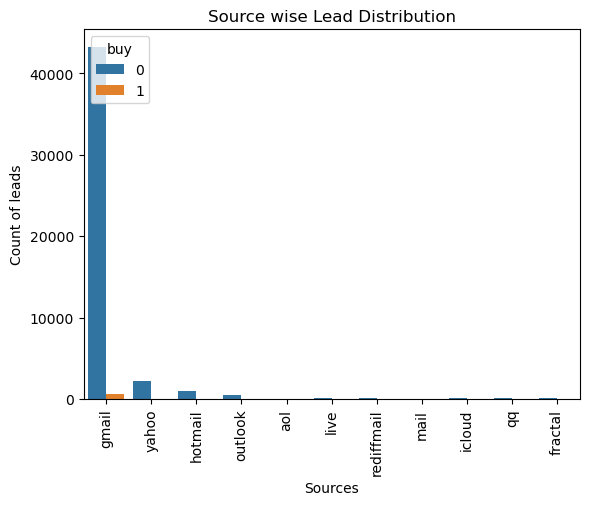

In [153]:
sns.countplot(x='subdomain',data=data,hue='buy')
plt.title('Source wise Lead Distribution')
plt.xlabel('Sources')
plt.ylabel('Count of leads')
plt.xticks(rotation = 90)

### Ext wise Lead Generation

In [154]:
ext_wise_lead = pd.crosstab(data['ext'],data['buy'])
ext_wise_lead

buy,0,1
ext,,
ai,150,0
co.in,159,2
co.uk,72,3
com,47056,683
fr,87,0
in,71,1
net,2,0


In [155]:
ext_wise_lead.div(ext_wise_lead.sum(axis=1), axis=0) * 100

buy,0,1
ext,,
ai,100.000000,0.000000
co.in,98.757764,1.242236
co.uk,96.000000,4.000000
com,98.569304,1.430696
fr,100.000000,0.000000
in,98.611111,1.388889
net,100.000000,0.000000


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'com'),
  Text(1, 0, 'co.uk'),
  Text(2, 0, 'co.in'),
  Text(3, 0, 'in'),
  Text(4, 0, 'fr'),
  Text(5, 0, 'ai'),
  Text(6, 0, 'net')])

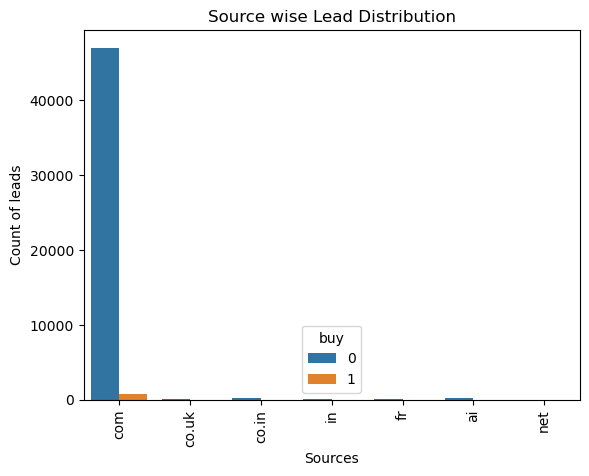

In [156]:
sns.countplot(x='ext',data=data,hue='buy')
plt.title('Source wise Lead Distribution')
plt.xlabel('Sources')
plt.ylabel('Count of leads')
plt.xticks(rotation = 90)

### Vintage wise Lead Generation

Text(0, 0.5, 'Count of leads')

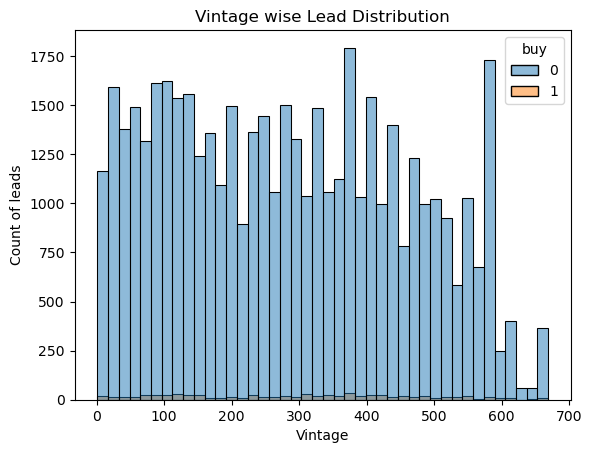

In [163]:
sns.histplot(x='vintage',data=data,hue='buy')
plt.title('Vintage wise Lead Distribution')
plt.xlabel('Vintage')
plt.ylabel('Count of leads')

### Lead Rate wise Lead Generation

Text(0, 0.5, 'Count of leads')

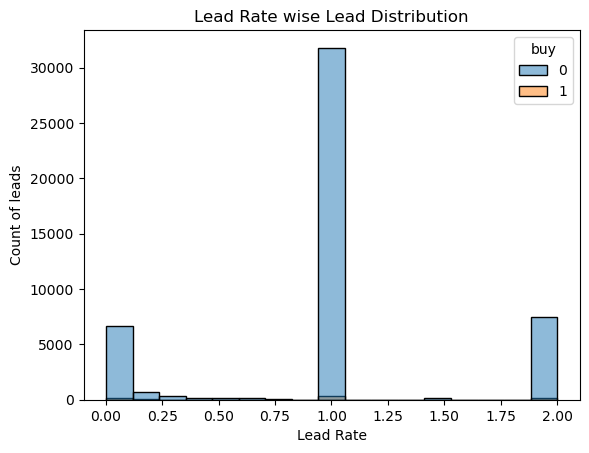

In [164]:
sns.histplot(x='lead_rate',data=data,hue='buy')
plt.title('Lead Rate wise Lead Distribution')
plt.xlabel('Lead Rate')
plt.ylabel('Count of leads')

### Lead wise Lead Generation

Text(0, 0.5, 'Count of leads')

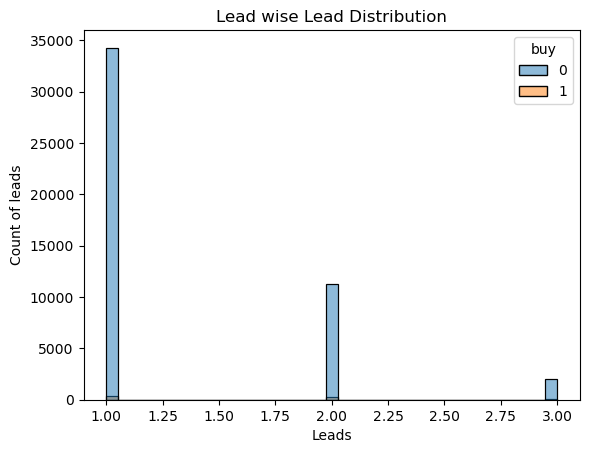

In [168]:
sns.histplot(x='#leads',data=data,hue='buy')
plt.title('Lead wise Lead Distribution')
plt.xlabel('Leads')
plt.ylabel('Count of leads')

## Feature Encoding

In [169]:
data_ml =data.copy()

### Dropping 'Created_at_Date','Created_at_Time' Columns

In [170]:
data_ml.drop(columns=['Created_at_Date','Created_at_Time'],inplace=True)

### DataType Conversion for features

In [171]:
data_ml[['Created_at_Year','Created_at_Month','quarter','weekday']] = data_ml[['Created_at_Year','Created_at_Month','quarter','weekday']].astype('object')

In [172]:
bool_cols = data_ml.select_dtypes(include='bool').columns.tolist()

In [173]:
bool_cols

['is_month_start',
 'is_month_end',
 'is_quarter_start',
 'is_quarter_end',
 'is_signedup']

In [174]:
data_ml[bool_cols] = data_ml[bool_cols].astype(int)

### Working with country_code feature (Combining less imp records as MIsc.)

In [175]:
data_ml['country_code'].value_counts(normalize=True)

91     0.559044
1      0.100795
234    0.058381
92     0.027006
254    0.018763
44     0.017500
55     0.014518
251    0.011204
880    0.010956
27     0.010603
233    0.010189
20     0.010065
98     0.009879
62     0.009485
971    0.006689
61     0.006482
977    0.006089
90     0.006006
33     0.005612
84     0.005385
49     0.005364
212    0.005136
94     0.004722
263    0.004308
966    0.004287
52     0.004018
60     0.003604
65     0.003604
57     0.003376
213    0.003314
7      0.003106
86     0.003065
256    0.003044
255    0.003003
216    0.002817
34     0.002589
63     0.002423
54     0.002423
237    0.002320
66     0.002299
39     0.002009
225    0.001988
260    0.001967
353    0.001967
82     0.001926
51     0.001843
972    0.001657
30     0.001615
964    0.001595
56     0.001533
250    0.001512
380    0.001450
31     0.001408
351    0.001408
886    0.001408
249    0.001243
Name: country_code, dtype: float64

In [176]:
data_ml['country_code'].value_counts().head(10).index

Int64Index([91, 1, 234, 92, 254, 44, 55, 251, 880, 27], dtype='int64')

In [177]:
country_code_ = [country_code for country_code in data['country_code'].value_counts().head(10).index]

In [179]:
for country_code in country_code_:
    data_ml[country_code]=np.where(data_ml['country_code']==country_code,1,0)

In [180]:
other_country_code = list(set(data_ml['country_code']) - set(country_code_))

data_ml['Other_country_codes'] = np.where(data_ml['country_code'].isin(other_country_code), 1, 0)

In [181]:
data_ml.drop(columns=['country_code'],inplace=True)

### Label Encoding for  Categorical variables

In [182]:
from sklearn.preprocessing import LabelEncoder

In [183]:
le = LabelEncoder()

In [186]:
categorical_features_ml = data_ml.select_dtypes(include='object')

In [187]:
for feature in categorical_features_ml:
    data_ml[feature] = le.fit_transform(data_ml[feature])

In [188]:
data_ml.head()

,Created_at_Year,Created_at_Month,quarter,weekday,is_weekend,is_month_start,is_month_end,is_quarter_start,is_quarter_end,experience,is_signedup,utm_source,utm_medium,subdomain,ext,vintage,#leads,lead_rate,form_1,form_2,form_3,form_4,form_5,form_6,form_7,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,buy,91,1,234,92,254,44,55,251,880,27,Other_country_codes
0,0,4,0,0,0,1,0,1,0,4,1,0,0,2,3,669,1,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,4,0,0,0,1,0,1,0,4,0,4,7,2,3,669,1,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,4,0,0,0,1,0,1,0,4,1,0,0,2,3,669,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,4,0,0,0,1,0,1,0,4,0,0,0,2,3,669,2,2.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,4,0,0,0,1,0,1,0,4,0,5,8,2,3,669,1,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [189]:
print('The size of Dataframe is: ', data.shape)
print('-'*100)
print('The Column Name, Record Count and Data Types are as follows: ')
data.info()
print('-'*100)

The size of Dataframe is:  (48286, 37)
----------------------------------------------------------------------------------------------------
The Column Name, Record Count and Data Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48286 entries, 0 to 48285
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Created_at_Year   48286 non-null  category
 1   Created_at_Month  48286 non-null  category
 2   Created_at_Date   48286 non-null  int64   
 3   Created_at_Time   48286 non-null  object  
 4   quarter           48286 non-null  category
 5   weekday           48286 non-null  category
 6   is_weekend        48286 non-null  int64   
 7   is_month_start    48286 non-null  bool    
 8   is_month_end      48286 non-null  bool    
 9   is_quarter_start  48286 non-null  bool    
 10  is_quarter_end    48286 non-null  bool    
 11  experience        48286 non-null  object  
 12  is_signedup 

## Feature Scaling

In [190]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [191]:
scaler = MinMaxScaler()

### Scaling 'vintage','#leads','lead_rate' features

In [193]:
scaling_features = ['vintage','#leads','lead_rate']

In [194]:
for feature in scaling_features:
    data_ml[feature] = scaler.fit_transform(data_ml[[feature]])

In [195]:
data_ml.head()

,Created_at_Year,Created_at_Month,quarter,weekday,is_weekend,is_month_start,is_month_end,is_quarter_start,is_quarter_end,experience,is_signedup,utm_source,utm_medium,subdomain,ext,vintage,#leads,lead_rate,form_1,form_2,form_3,form_4,form_5,form_6,form_7,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,buy,91,1,234,92,254,44,55,251,880,27,Other_country_codes
0,0,4,0,0,0,1,0,1,0,4,1,0,0,2,3,1.0,0.0,0.499621,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,4,0,0,0,1,0,1,0,4,0,4,7,2,3,1.0,0.0,0.499621,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,4,0,0,0,1,0,1,0,4,1,0,0,2,3,1.0,0.0,0.499621,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,4,0,0,0,1,0,1,0,4,0,0,0,2,3,1.0,0.5,1.000000,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,4,0,0,0,1,0,1,0,4,0,5,8,2,3,1.0,0.0,0.499621,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Feature Selection

### Creating Feature Matrix & Target Variable

In [196]:
X = data_ml.drop('buy',axis=1) # Feature Matrix

y = data_ml['buy'] # Target variable

### Splitting into Train & Test

In [197]:
from sklearn.model_selection import train_test_split

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
X_train.shape, y_train.shape

((36214, 44), (36214,))

### Checking for important features

In [210]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()

print(model.fit(X,y))

ExtraTreesRegressor()


In [211]:
print('-'*50)
print('Checking for feature importance')
print('-'*50)

print(model.feature_importances_)

--------------------------------------------------
Checking for feature importance
--------------------------------------------------
[2.57518951e-02 8.56031611e-02 5.12921528e-02 1.04400976e-01
 2.63776848e-02 5.34284651e-03 1.33080367e-02 1.92390743e-03
 3.88760682e-03 9.06720389e-02 4.16203743e-02 5.43191324e-02
 5.38259222e-02 2.40579102e-02 5.16688407e-03 1.52036373e-01
 1.90553775e-02 6.57121675e-02 2.05502731e-02 6.67574442e-03
 1.06105252e-02 7.37181713e-03 1.51297852e-02 2.63824364e-02
 1.43384061e-02 6.34161638e-03 9.66738243e-04 1.64659707e-02
 3.96557534e-03 1.51760507e-02 1.12879947e-03 8.97114936e-04
 1.10761782e-03 8.55337935e-03 8.84305184e-03 1.76931791e-03
 1.67953727e-04 3.28003564e-04 2.61556350e-03 3.85804887e-05
 4.88686190e-05 2.95894797e-04 1.30738683e-03 4.56908060e-03]


### Visualization for  feature importance

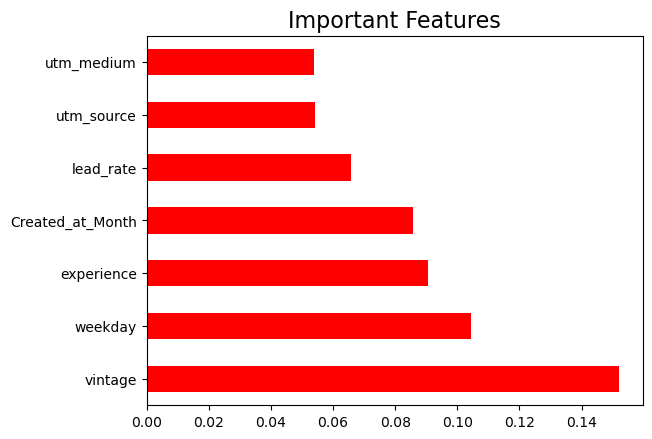

In [212]:
imp_feature = pd.Series(model.feature_importances_, index = X.columns)
imp_feature.nlargest(7).plot(kind = 'barh', color='red')
plt.title('Important Features', fontsize=16)
plt.show()

However, we will use all features for prediction

### Checking for Correlation

In [213]:
def correlation (dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)) :
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [214]:
corr_features = correlation(x_train,0.6)

print('-'*50)
print('Total Correlated Features are as follows :')
print('-'*50)

len(corr_features)


print('-'*50)
print(f'Correlated Features are : {corr_features}')
print('-'*50)


--------------------------------------------------
Total Correlated Features are as follows :
--------------------------------------------------
--------------------------------------------------
Correlated Features are : {'is_quarter_start', 'vintage'}
--------------------------------------------------


### Dropping Correlated features

In [133]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

In [134]:
x_train.shape

(36214, 43)

In [135]:
x_train.reset_index(drop=True,inplace=True)
x_test.reset_index(drop=True,inplace=True)

In [136]:
x_train.head()

,Created_at_Year,Created_at_Month,quarter,weekday,is_weekend,is_month_start,is_month_end,is_quarter_end,experience,is_signedup,utm_source,utm_medium,subdomain,ext,Lead_created_days_ago,#leads,lead_rate,form_1,form_2,form_3,form_4,form_5,form_6,form_7,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,91,1,234,92,254,44,55,251,880,27,Other_country_codes
0,1,8,1,3,1,0,0,0,0,1,6,9,2,3,NaN,1.0,0.082638,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,5,2,0,0,1,0,0,2,0,2,5,2,3,NaN,0.0,0.499621,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,6,1,0,0,0,0,0,2,1,7,1,2,3,NaN,0.5,1.000000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,3,0,1,0,0,0,0,4,0,7,11,2,3,NaN,0.0,0.499621,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,6,1,5,0,0,0,0,4,1,6,9,2,3,NaN,0.5,1.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# Model Building

In [215]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [216]:
models = [ LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor, Ridge, Lasso]
mse = []
rmse = []
evs = []
r_square_score = []

for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    mse.append(mean_squared_error(y_true= y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred)))
    evs.append(explained_variance_score(y_true= y_test, y_pred= pred))
    r_square_score.append(r2_score(y_true= y_test, y_pred= pred))


## Creating DataFrame for Model Comparison

In [ ]:
ML_model_df=pd.DataFrame({"Model":[ 'Linear Regression', 'Support Vector Rregression', 'Decision Tree Regressor', \
                                   'Random Forest Regressor', 'Ridge', 'Lasso'],
                         "Mean Squarred Error":mse,
                         "Root Mean Squarred Error":rmse,
                         "Explained Variance Score":evs,
                         "R-Sqaure Score(Accuracy)":r_square_score})

ML_model_df.set_index('Model',inplace=True)
ML_model_df

# Model Building

In [137]:
# Importing required ML algorithm to be used as per problem statement

from sklearn.linear_model import LogisticRegression

In [138]:
lr = LogisticRegression()

In [139]:
# Fitting train data using algoritm

lr_model = lr.fit(x_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [140]:
lr.score(x_train,y_train)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

##### Inference

## 6. Missing Value and Outlier Treatment

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Data Exploration and Preprocessing
# Load the dataset
data = pd.read_csv('data.csv')

# Handle missing values and outliers

# Convert categorical variables into numerical representations (e.g., one-hot encoding, label encoding)

# Split the dataset into training and testing sets
X = data.drop('buy', axis=1)  # Features
y = data['buy']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Feature Engineering (if required)
# Extract insights from existing features

# Engineer new features if necessary

# Scale or normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Model Training
# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Step 4: Model Evaluation
# Predict using the trained model
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Additional steps as per your specific requirements


ValueError: could not convert string to float: '2021-08-28 11:30:53'

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('data.csv')

# Drop any columns that are not required for the analysis
data = data.drop(columns=['created_at', 'subdomain', 'ext'])

# Convert boolean columns to integers (True=1, False=0)
boolean_cols = ['is_signedup', 'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end']
data[boolean_cols] = data[boolean_cols].astype(int)

# Encode categorical columns using LabelEncoder
categorical_cols = ['country_code', 'form_type', 'experience', 'utm_source', 'utm_medium']
label_encoder = LabelEncoder()
data[categorical_cols] = data[categorical_cols].apply(label_encoder.fit_transform)

# Perform feature scaling or normalization if required
# You can use techniques like StandardScaler or MinMaxScaler from sklearn.preprocessing

# Split the dataset into features and target variable
X = data.drop('buy', axis=1)  # Features
y = data['buy']  # Target variable

# Additional preprocessing steps as per your specific requirements

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling or normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predict using the trained model
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9832490256240153
Precision: 0.3076923076923077
Recall: 0.02030456852791878
F1-score: 0.03809523809523809
